# Project: Wine quality classification

# About the datases:

link to hte dataset at Kaggle:
https://www.kaggle.com/danielpanizzo/wine-quality

Citation Request:
This dataset is public available for research. The details are described in [Cortez et al., 2009].
Please include this citation if you plan to use this database:

P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis.
Modeling wine preferences by data mining from physicochemical properties.
In Decision Support Systems, Elsevier, 47(4):547-553. ISSN: 0167-9236.

Available at: [@Elsevier] http://dx.doi.org/10.1016/j.dss.2009.05.016
[Pre-press (pdf)] http://www3.dsi.uminho.pt/pcortez/winequality09.pdf
[bib] http://www3.dsi.uminho.pt/pcortez/dss09.bib

Title: Wine Quality

Sources
Created by: Paulo Cortez (Univ. Minho), Antonio Cerdeira, Fernando Almeida, Telmo Matos and Jose Reis (CVRVV) @ 2009

Past Usage:

P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis.
Modeling wine preferences by data mining from physicochemical properties.
In Decision Support Systems, Elsevier, 47(4):547-553. ISSN: 0167-9236.

In the above reference, two datasets were created, using red and white wine samples.
The inputs include objective tests (e.g. PH values) and the output is based on sensory data
(median of at least 3 evaluations made by wine experts). Each expert graded the wine quality
between 0 (very bad) and 10 (very excellent). Several data mining methods were applied to model
these datasets under a regression approach. The support vector machine model achieved the
best results. Several metrics were computed: MAD, confusion matrix for a fixed error tolerance (T),
etc. Also, we plot the relative importances of the input variables (as measured by a sensitivity
analysis procedure).

Relevant Information:

The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine.
For more details, consult: http://www.vinhoverde.pt/en/ or the reference [Cortez et al., 2009].
Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables
are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

These datasets can be viewed as classification or regression tasks.
The classes are ordered and not balanced (e.g. there are munch more normal wines than
excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent
or poor wines. Also, we are not sure if all input variables are relevant. So
it could be interesting to test feature selection methods.

Number of Instances: red wine - 1599; white wine - 4898.

Number of Attributes: 11 + output attribute

Note: several of the attributes may be correlated, thus it makes sense to apply some sort of
feature selection.

Attribute information:

For more information, read [Cortez et al., 2009].

Input variables (based on physicochemical tests):
1 - fixed acidity (tartaric acid - g / dm^3)
2 - volatile acidity (acetic acid - g / dm^3)
3 - citric acid (g / dm^3)
4 - residual sugar (g / dm^3)
5 - chlorides (sodium chloride - g / dm^3
6 - free sulfur dioxide (mg / dm^3)
7 - total sulfur dioxide (mg / dm^3)
8 - density (g / cm^3)
9 - pH
10 - sulphates (potassium sulphate - g / dm3)
11 - alcohol (% by volume)
Output variable (based on sensory data):
12 - quality (score between 0 and 10)

Missing Attribute Values: None

Description of attributes:

1 - fixed acidity: most acids involved with wine or fixed or nonvolatile (do not evaporate readily)

2 - volatile acidity: the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste

3 - citric acid: found in small quantities, citric acid can add 'freshness' and flavor to wines

4 - residual sugar: the amount of sugar remaining after fermentation stops, it's rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet

5 - chlorides: the amount of salt in the wine

6 - free sulfur dioxide: the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine

7 - total sulfur dioxide: amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine

8 - density: the density of water is close to that of water depending on the percent alcohol and sugar content

9 - pH: describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale

10 - sulphates: a wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial and antioxidant

11 - alcohol: the percent alcohol content of the wine

Output variable (based on sensory data):
12 - quality (score between 0 and 10)

# Red wines: STEP 1: Learning the dataset and feature engineering

In [2]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# importing the dataset
df = pd.read_csv("wineQualityReds.csv", index_col=0)

Learning the dataset and making feature engineering

In [4]:
# showing first five rows of the dateset
df.head()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
2,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
3,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
4,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
5,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
# showing the column names
list(df.columns)

['fixed.acidity',
 'volatile.acidity',
 'citric.acid',
 'residual.sugar',
 'chlorides',
 'free.sulfur.dioxide',
 'total.sulfur.dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

In [6]:
# showing statistical information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1599 entries, 1 to 1599
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed.acidity         1599 non-null   float64
 1   volatile.acidity      1599 non-null   float64
 2   citric.acid           1599 non-null   float64
 3   residual.sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free.sulfur.dioxide   1599 non-null   float64
 6   total.sulfur.dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 162.4 KB


In [7]:
# showing statistical data of the dataset
df.describe()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Visualize data columns

Explore distribution, skewness, outliers and other statistical properties

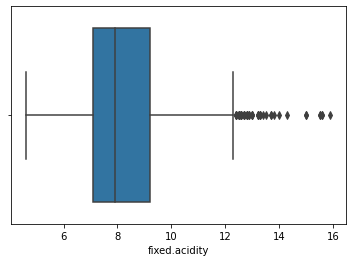

In [8]:
# plotting fixed.acidity variable
ax = sns.boxplot(x=df["fixed.acidity"]);

In [9]:
# finding outliers
df.loc[df["fixed.acidity"] > 14.5]

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
244,15.0,0.210,0.44,2.2,0.075,10.0,24.0,1.00005,3.07,0.84,9.2,7
245,15.0,0.210,0.44,2.2,0.075,10.0,24.0,1.00005,3.07,0.84,9.2,7
443,15.6,0.685,0.76,3.7,0.100,6.0,43.0,1.00320,2.95,0.68,11.2,7
555,15.5,0.645,0.49,4.2,0.095,10.0,23.0,1.00315,2.92,0.74,11.1,5
556,15.5,0.645,0.49,4.2,0.095,10.0,23.0,1.00315,2.92,0.74,11.1,5
558,15.6,0.645,0.49,4.2,0.095,10.0,23.0,1.00315,2.92,0.74,11.1,5
653,15.9,0.360,0.65,7.5,0.096,22.0,71.0,0.99760,2.98,0.84,14.9,5


In [10]:
# deleting the outliers
df = df.drop(df.loc[df["fixed.acidity"] > 14.5].index)

In [11]:
# printing skewness and kurtosis
skewness = df["fixed.acidity"].skew()
kurtosis = df["fixed.acidity"].kurtosis()
print("skewnessis {:.2f}, kurtosis is {:.2f}".format(skewness, kurtosis))

skewnessis 0.82, kurtosis is 0.41


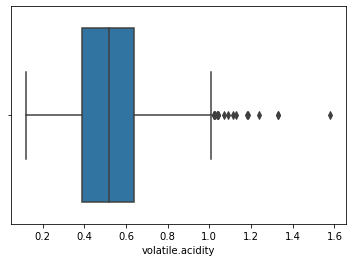

In [12]:
# plotting volatile.acidity variable
ax = sns.boxplot(x=df["volatile.acidity"]);

In [13]:
# finding outliers
df.loc[df["volatile.acidity"] > 1.2]

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
127,8.2,1.33,0.00,1.7,0.081,3.0,12.0,0.99640,3.53,0.49,10.9,5
128,8.1,1.33,0.00,1.8,0.082,3.0,12.0,0.99640,3.54,0.48,10.9,5
673,9.8,1.24,0.34,2.0,0.079,32.0,151.0,0.99800,3.15,0.53,9.5,5
1300,7.6,1.58,0.00,2.1,0.137,5.0,9.0,0.99476,3.50,0.40,10.9,3


In [14]:
# deleting the outliers
df = df.drop(df.loc[df["volatile.acidity"] > 1.05].index)

In [15]:
# printing skewness and kurtosis
skewness = df["volatile.acidity"].skew()
kurtosis = df["volatile.acidity"].kurtosis()
print("skewnessis {:.2f}, kurtosis is {:.2f}".format(skewness, kurtosis))

skewnessis 0.37, kurtosis is -0.11


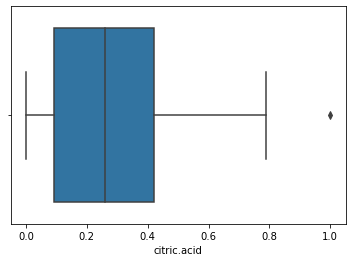

In [16]:
# plotting citric.acid variable
ax = sns.boxplot(x=df["citric.acid"]);

In [17]:
# finding outliers
df.loc[df["citric.acid"] > 0.9]

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
152,9.2,0.52,1.0,3.4,0.61,32.0,69.0,0.9996,2.74,2.0,9.4,4


In [18]:
# deleting the outliers
df = df.drop(df.loc[df["citric.acid"] > 0.9].index)

In [19]:
# printing skewness and kurtosis
skewness = df["citric.acid"].skew()
kurtosis = df["citric.acid"].kurtosis()
print("skewnessis {:.2f}, kurtosis is {:.2f}".format(skewness, kurtosis))

skewnessis 0.29, kurtosis is -0.87


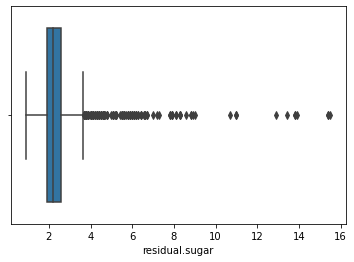

In [20]:
# plotting residual.sugar variable
ax = sns.boxplot(x=df["residual.sugar"]);

In [21]:
# finding outliers
df.loc[df["residual.sugar"] > 10]

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
34,6.9,0.605,0.12,10.7,0.073,40.0,83.0,0.99930,3.45,0.52,9.4,6
325,10.0,0.490,0.20,11.0,0.071,13.0,50.0,1.00150,3.16,0.69,9.2,6
326,10.0,0.490,0.20,11.0,0.071,13.0,50.0,1.00150,3.16,0.69,9.2,6
481,10.6,0.280,0.39,15.5,0.069,6.0,23.0,1.00260,3.12,0.66,9.2,5
1236,6.0,0.330,0.32,12.9,0.054,6.0,113.0,0.99572,3.30,0.56,11.5,4
1245,5.9,0.290,0.25,13.4,0.067,72.0,160.0,0.99721,3.33,0.54,10.3,6
1435,10.2,0.540,0.37,15.4,0.214,55.0,95.0,1.00369,3.18,0.77,9.0,6
1436,10.2,0.540,0.37,15.4,0.214,55.0,95.0,1.00369,3.18,0.77,9.0,6
1475,9.9,0.500,0.50,13.8,0.205,48.0,82.0,1.00242,3.16,0.75,8.8,5
1477,9.9,0.500,0.50,13.8,0.205,48.0,82.0,1.00242,3.16,0.75,8.8,5


In [22]:
# deleting the outliers
df = df.drop(df.loc[df["residual.sugar"] > 10].index)

In [23]:
# printing skewness and kurtosis
skewness = df["residual.sugar"].skew()
kurtosis = df["residual.sugar"].kurtosis()
print("skewnessis {:.2f}, kurtosis is {:.2f}".format(skewness, kurtosis))

skewnessis 2.95, kurtosis is 10.59


In [24]:
# residual.sugar distribution is highly skewed
# trying log transformation to improve the skewness
log_residual_sugar_skewness = np.log(df["residual.sugar"]).skew()
log_residual_sugar_skewness

1.4352799678870134

In [25]:
# creating log(residual.sugar) column
df["log(residual.sugar)"] = np.log(df['residual.sugar'])

In [26]:
# removing residual.sugar column
df.drop(["residual.sugar"], axis=1, inplace=True)

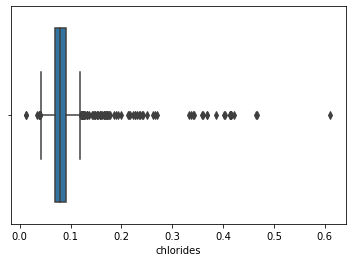

In [27]:
# plotting chlorides variable
ax = sns.boxplot(x=df["chlorides"]);

In [28]:
# finding outliers
df.loc[df["chlorides"] > 0.45]

,fixed.acidity,volatile.acidity,citric.acid,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,log(residual.sugar)
82,7.8,0.43,0.70,0.464,22.0,67.0,0.9974,3.13,1.28,9.4,5,0.641854
107,7.8,0.41,0.68,0.467,18.0,69.0,0.9973,3.08,1.31,9.3,5,0.530628
259,7.7,0.41,0.76,0.611,8.0,45.0,0.9968,3.06,1.26,9.4,5,0.587787


In [29]:
# deleting the outliers
df = df.drop(df.loc[df["chlorides"] > 0.45].index)

In [30]:
# printing skewness and kurtosis
skewness = df["chlorides"].skew()
kurtosis = df["chlorides"].kurtosis()
print("skewnessis {:.2f}, kurtosis is {:.2f}".format(skewness, kurtosis))

skewnessis 5.17, kurtosis is 33.85


In [31]:
# chlorides distribution is highly skewed
# trying log transformation to improve the skewness
log_chlorides_skewness = np.log(df["chlorides"]).skew()
log_chlorides_skewness

1.4928931124481057

In [32]:
# creating log(chlorides) column
df["log(chlorides)"] = np.sqrt(df['chlorides'])

In [33]:
# removing chlorides column
df.drop(["chlorides"], axis=1, inplace=True)

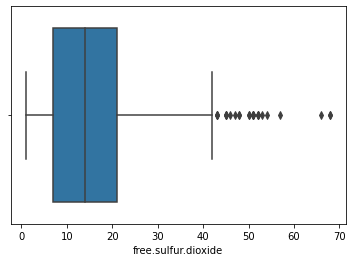

In [34]:
# plotting free.sulfur.dioxide variable
ax = sns.boxplot(x=df["free.sulfur.dioxide"]);

In [35]:
# finding outliers
df.loc[df["free.sulfur.dioxide"] > 60]

,fixed.acidity,volatile.acidity,citric.acid,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,log(residual.sugar),log(chlorides)
397,6.6,0.735,0.02,68.0,124.0,0.99940,3.47,0.53,9.9,5,2.066863,0.349285
401,6.6,0.735,0.02,68.0,124.0,0.99940,3.47,0.53,9.9,5,2.066863,0.349285
1559,6.9,0.630,0.33,66.0,115.0,0.99787,3.22,0.56,9.5,5,1.902108,0.484768


In [36]:
# deleting the outliers
df = df.drop(df.loc[df["free.sulfur.dioxide"] > 60].index)

In [37]:
# printing skewness and kurtosis
skewness = df["free.sulfur.dioxide"].skew()
kurtosis = df["free.sulfur.dioxide"].kurtosis()
print("skewnessis {:.2f}, kurtosis is {:.2f}".format(skewness, kurtosis))

skewnessis 1.02, kurtosis is 0.77


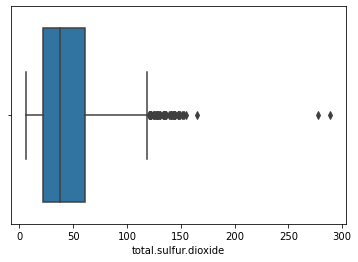

In [38]:
# plotting total.sulfur.dioxide variable
ax = sns.boxplot(x=df["total.sulfur.dioxide"]);

In [39]:
# finding outliers
df.loc[df["total.sulfur.dioxide"] > 200]

,fixed.acidity,volatile.acidity,citric.acid,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,log(residual.sugar),log(chlorides)
1080,7.9,0.3,0.68,37.5,278.0,0.99316,3.01,0.51,12.3,7,2.116256,0.223607
1082,7.9,0.3,0.68,37.5,289.0,0.99316,3.01,0.51,12.3,7,2.116256,0.223607


In [40]:
# deleting the outliers
df = df.drop(df.loc[df["total.sulfur.dioxide"] > 200].index)

In [41]:
# printing skewness and kurtosis
skewness = df["total.sulfur.dioxide"].skew()
kurtosis = df["total.sulfur.dioxide"].kurtosis()
print("skewnessis {:.2f}, kurtosis is {:.2f}".format(skewness, kurtosis))

skewnessis 1.19, kurtosis is 0.98


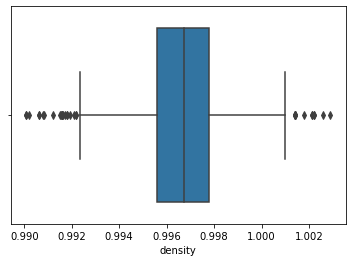

In [42]:
# plotting density variable
ax = sns.boxplot(x=df["density"]);

In [43]:
# printing skewness and kurtosis
skewness = df["density"].skew()
kurtosis = df["density"].kurtosis()
print("skewnessis {:.2f}, kurtosis is {:.2f}".format(skewness, kurtosis))

skewnessis -0.11, kurtosis is 0.65


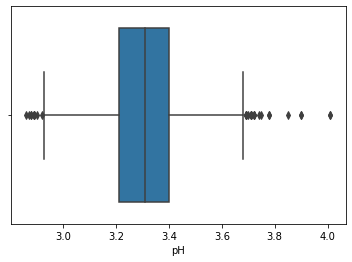

In [44]:
# plotting pH variable
ax = sns.boxplot(x=df["pH"]);

In [45]:
# printing skewness and kurtosis
skewness = df["pH"].skew()
kurtosis = df["pH"].kurtosis()
print("skewnessis {:.2f}, kurtosis is {:.2f}".format(skewness, kurtosis))

skewnessis 0.26, kurtosis is 0.83


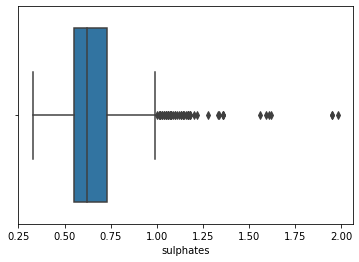

In [46]:
# plotting sulphates variable
ax = sns.boxplot(x=df["sulphates"]);

In [47]:
# finding outliers
df.loc[df["sulphates"] > 1.5]

,fixed.acidity,volatile.acidity,citric.acid,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,log(residual.sugar),log(chlorides)
14,7.8,0.610,0.29,9.0,29.0,0.9974,3.26,1.56,9.1,5,0.470004,0.337639
87,8.6,0.490,0.28,20.0,136.0,0.9972,2.93,1.95,9.9,6,0.641854,0.331662
92,8.6,0.490,0.28,20.0,136.0,0.9972,2.93,1.95,9.9,6,0.641854,0.331662
93,8.6,0.490,0.29,19.0,133.0,0.9972,2.93,1.98,9.8,5,0.693147,0.331662
170,7.5,0.705,0.24,15.0,63.0,0.9964,3.00,1.59,9.5,5,0.587787,0.600000
227,8.9,0.590,0.50,27.0,81.0,0.9964,3.04,1.61,9.5,6,0.693147,0.580517
724,7.1,0.310,0.30,36.0,127.0,0.9965,2.94,1.62,9.5,5,0.788457,0.230217


In [48]:
# deleting the outliers
df = df.drop(df.loc[df["sulphates"] > 1.5].index)

In [49]:
# printing skewness and kurtosis
skewness = df["sulphates"].skew()
kurtosis = df["sulphates"].kurtosis()
print("skewnessis {:.2f}, kurtosis is {:.2f}".format(skewness, kurtosis))

skewnessis 1.31, kurtosis is 2.59


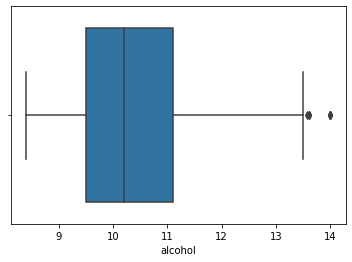

In [50]:
# plotting alcohol variable
ax = sns.boxplot(x=df["alcohol"]);

In [51]:
# printing skewness and kurtosis
skewness = df["alcohol"].skew()
kurtosis = df["alcohol"].kurtosis()
print("skewnessis {:.2f}, kurtosis is {:.2f}".format(skewness, kurtosis))

skewnessis 0.84, kurtosis is 0.08


C:\Users\artem\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


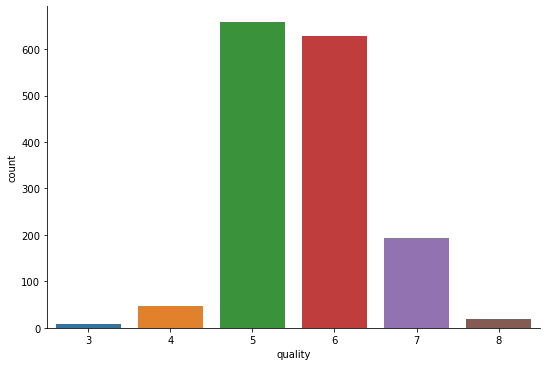

In [52]:
# plotting quality variable
ax = sns.catplot("quality", data=df, kind='count', aspect=1.5);

In [53]:
# counting all the values of categorical dependent variable quality
df["quality"].value_counts(dropna=False)

5    659
6    628
7    194
4     48
8     18
3      8
Name: quality, dtype: int64

In [54]:
# deleting the outliers
df = df.drop(df.loc[df["quality"] == 3].index)
df = df.drop(df.loc[df["quality"] == 8].index)

In [55]:
# counting all the values of categorical dependent variable quality
df["quality"].value_counts(dropna=False)

5    659
6    628
7    194
4     48
Name: quality, dtype: int64

In [56]:
# showing the column names
list(df.columns)

['fixed.acidity',
 'volatile.acidity',
 'citric.acid',
 'free.sulfur.dioxide',
 'total.sulfur.dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality',
 'log(residual.sugar)',
 'log(chlorides)']

In [57]:
# reordering the dataframe columns in original order
df = df[['fixed.acidity',
 'volatile.acidity',
 'citric.acid',
 'log(residual.sugar)',
 'log(chlorides)',
 'free.sulfur.dioxide',
 'total.sulfur.dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']]

In [58]:
# calculating a correlation matrix
corr_matrix = df.corr()

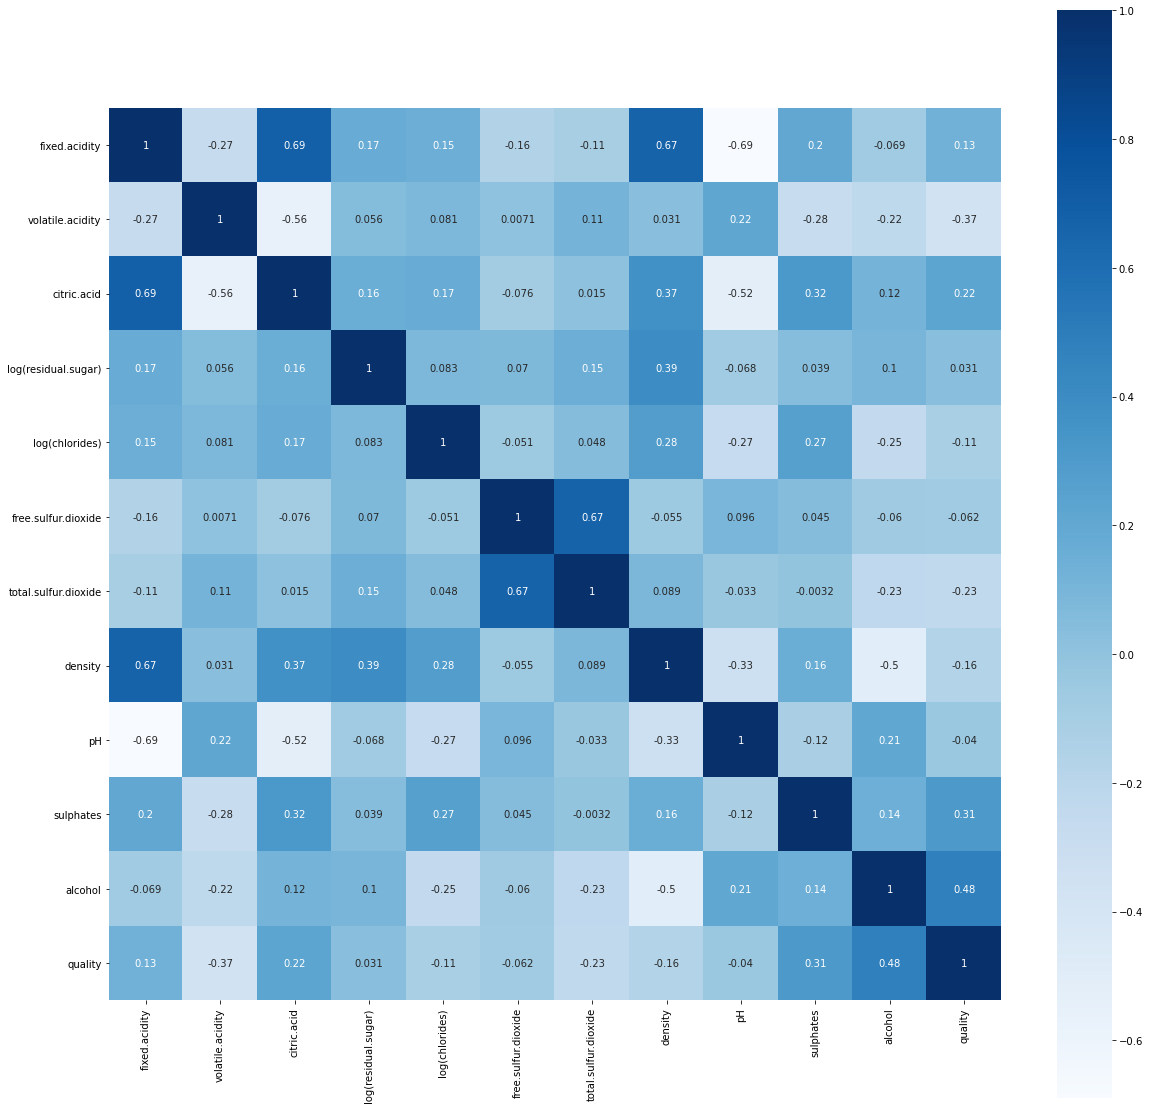

In [59]:
# drawing a heatmap
plt.figure(figsize = (20,20))
ax = sns.heatmap(corr_matrix, annot=True, square=True, cmap='Blues')
plt.show()

Discussion: density is correlated with residual.sugar and alcohol.

Discussion: variables log(residual.sugar) and pH have futile influence on the quality

In [60]:
# removing citric.acid column
df.drop(["log(residual.sugar)"], axis=1, inplace=True)

In [61]:
# removing  free.sulfur.dioxide column
df.drop(["pH"], axis=1, inplace=True)

In [62]:
df.head()

,fixed.acidity,volatile.acidity,citric.acid,log(chlorides),free.sulfur.dioxide,total.sulfur.dioxide,density,sulphates,alcohol,quality
1,7.4,0.70,0.00,0.275681,11.0,34.0,0.9978,0.56,9.4,5
2,7.8,0.88,0.00,0.313050,25.0,67.0,0.9968,0.68,9.8,5
3,7.8,0.76,0.04,0.303315,15.0,54.0,0.9970,0.65,9.8,5
4,11.2,0.28,0.56,0.273861,17.0,60.0,0.9980,0.58,9.8,6
5,7.4,0.70,0.00,0.275681,11.0,34.0,0.9978,0.56,9.4,5


# Red wines: STEP 2: Choosing best performing machine learning model

In [63]:
# defining variables
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [64]:
# splitting the dataset to a train and a test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [65]:
# feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Logistic Regression

In [66]:
# training the  model on the training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=42)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [67]:
# predicting y_test
y_pred = classifier.predict(X_test)

In [68]:
# making the confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 0  6  3  0]
 [ 0 91 33  0]
 [ 0 46 80  8]
 [ 0  3 27  9]]


0.5882352941176471

In [69]:
# applying k-fold cross validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 61.09 %
Standard Deviation: 4.35 %


# K Nearest Neighbors

In [70]:
# training the  model on the training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [71]:
# predicting y_test
y_pred = classifier.predict(X_test)

In [72]:
# making the confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 0  5  4  0]
 [ 1 90 29  4]
 [ 0 46 82  6]
 [ 0  3 27  9]]


0.5915032679738562

In [73]:
# applying k-fold cross validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 59.20 %
Standard Deviation: 4.70 %


# Support Vector Machine

In [74]:
# training the SVM model on the training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 42)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [75]:
# predicting y_valid
y_pred = classifier.predict(X_test)

In [76]:
# making the confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 0  6  3  0]
 [ 0 92 32  0]
 [ 0 49 85  0]
 [ 0  3 36  0]]


0.5784313725490197

In [77]:
# applying k-fold cross validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 59.45 %
Standard Deviation: 3.56 %


# Kernel SVM

In [78]:
# training the  model on the training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 42)
classifier.fit(X_train, y_train)

SVC(random_state=42)

In [79]:
# predicting y_valid
y_pred = classifier.predict(X_test)

In [80]:
# making the confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 0  5  4  0]
 [ 0 93 30  1]
 [ 0 46 85  3]
 [ 0  2 29  8]]


0.6078431372549019

In [81]:
# applying k-fold cross validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 63.63 %
Standard Deviation: 4.94 %


# Naive Bayes

In [82]:
# training the  model on the training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [83]:
# predicting the test set results
y_pred = classifier.predict(X_test)

In [84]:
# making the confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 2  3  4  0]
 [ 7 81 35  1]
 [ 1 53 60 20]
 [ 0  5 16 18]]


0.5261437908496732

In [85]:
# applying k-fold cross validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 57.32 %
Standard Deviation: 3.44 %


# Decision Tree Classification

In [86]:
# training the  model on the training set
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [87]:
# predicting the test set results
y_pred = classifier.predict(X_test)

In [88]:
# making the confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 0  3  4  2]
 [ 4 89 27  4]
 [ 3 29 87 15]
 [ 0  4 18 17]]


0.630718954248366

In [89]:
# applying k-fold cross validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 62.31 %
Standard Deviation: 3.59 %


# Random Forest Classification

In [90]:
# training the  model on the training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 15, criterion = 'entropy', random_state = 42)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=15, random_state=42)

In [91]:
# predicting the test set results
y_pred = classifier.predict(X_test)

In [92]:
# making the confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 0  6  3  0]
 [ 3 98 20  3]
 [ 2 32 93  7]
 [ 0  1 21 17]]


0.6797385620915033

In [93]:
# applying k-fold cross validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 68.44 %
Standard Deviation: 4.31 %


# XG Boost

In [94]:
# training the  model on the training set
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X_train, y_train)

C:\Users\artem\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:12:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [95]:
# predicting the test set results
y_pred = classifier.predict(X_test)

In [96]:
# making the confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 0  4  3  2]
 [ 0 99 25  0]
 [ 1 31 90 12]
 [ 0  2 21 16]]


0.6699346405228758

In [97]:
# applying k-fold cross validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

[14:12:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\artem\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\artem\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:12:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\artem\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:12:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\artem\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:12:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\artem\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:12:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\artem\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:12:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\artem\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:12:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\artem\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:12:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\artem\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:12:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\artem\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:12:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 67.38 %
Standard Deviation: 5.02 %


# Cat Boost

In [98]:
# training the  model on the training set
from catboost import CatBoostClassifier
classifier = CatBoostClassifier()
classifier.fit(X_train, y_train)

Learning rate set to 0.079943
0:	learn: 1.3279422	total: 154ms	remaining: 2m 33s
1:	learn: 1.2772962	total: 166ms	remaining: 1m 22s
2:	learn: 1.2367833	total: 178ms	remaining: 59.2s
3:	learn: 1.1954857	total: 193ms	remaining: 48.1s
4:	learn: 1.1567377	total: 214ms	remaining: 42.5s
5:	learn: 1.1250470	total: 225ms	remaining: 37.3s
6:	learn: 1.0963071	total: 233ms	remaining: 33.1s
7:	learn: 1.0722006	total: 248ms	remaining: 30.7s
8:	learn: 1.0502091	total: 262ms	remaining: 28.9s
9:	learn: 1.0303536	total: 276ms	remaining: 27.3s
10:	learn: 1.0100359	total: 287ms	remaining: 25.8s
11:	learn: 0.9922856	total: 301ms	remaining: 24.8s
12:	learn: 0.9761731	total: 315ms	remaining: 23.9s
13:	learn: 0.9617724	total: 329ms	remaining: 23.2s
14:	learn: 0.9498657	total: 340ms	remaining: 22.3s
15:	learn: 0.9379265	total: 351ms	remaining: 21.6s
16:	learn: 0.9265379	total: 363ms	remaining: 21s
17:	learn: 0.9142434	total: 390ms	remaining: 21.3s
18:	learn: 0.9024010	total: 410ms	remaining: 21.2s
19:	learn: 

169:	learn: 0.5276814	total: 3s	remaining: 14.7s
170:	learn: 0.5266940	total: 3.02s	remaining: 14.6s
171:	learn: 0.5245726	total: 3.03s	remaining: 14.6s
172:	learn: 0.5235243	total: 3.05s	remaining: 14.6s
173:	learn: 0.5223773	total: 3.06s	remaining: 14.6s
174:	learn: 0.5206034	total: 3.08s	remaining: 14.5s
175:	learn: 0.5195879	total: 3.1s	remaining: 14.5s
176:	learn: 0.5182662	total: 3.11s	remaining: 14.5s
177:	learn: 0.5167200	total: 3.12s	remaining: 14.4s
178:	learn: 0.5155482	total: 3.14s	remaining: 14.4s
179:	learn: 0.5142138	total: 3.15s	remaining: 14.4s
180:	learn: 0.5128235	total: 3.17s	remaining: 14.3s
181:	learn: 0.5119009	total: 3.18s	remaining: 14.3s
182:	learn: 0.5095557	total: 3.2s	remaining: 14.3s
183:	learn: 0.5086681	total: 3.22s	remaining: 14.3s
184:	learn: 0.5080720	total: 3.23s	remaining: 14.2s
185:	learn: 0.5063979	total: 3.25s	remaining: 14.2s
186:	learn: 0.5050441	total: 3.26s	remaining: 14.2s
187:	learn: 0.5044452	total: 3.27s	remaining: 14.1s
188:	learn: 0.502

328:	learn: 0.3562236	total: 5.16s	remaining: 10.5s
329:	learn: 0.3557795	total: 5.18s	remaining: 10.5s
330:	learn: 0.3553032	total: 5.19s	remaining: 10.5s
331:	learn: 0.3546027	total: 5.21s	remaining: 10.5s
332:	learn: 0.3533947	total: 5.22s	remaining: 10.5s
333:	learn: 0.3526749	total: 5.23s	remaining: 10.4s
334:	learn: 0.3519197	total: 5.24s	remaining: 10.4s
335:	learn: 0.3515576	total: 5.26s	remaining: 10.4s
336:	learn: 0.3504631	total: 5.27s	remaining: 10.4s
337:	learn: 0.3495779	total: 5.28s	remaining: 10.3s
338:	learn: 0.3486971	total: 5.3s	remaining: 10.3s
339:	learn: 0.3480087	total: 5.31s	remaining: 10.3s
340:	learn: 0.3468785	total: 5.33s	remaining: 10.3s
341:	learn: 0.3464314	total: 5.34s	remaining: 10.3s
342:	learn: 0.3455722	total: 5.36s	remaining: 10.3s
343:	learn: 0.3444248	total: 5.38s	remaining: 10.3s
344:	learn: 0.3438658	total: 5.39s	remaining: 10.2s
345:	learn: 0.3429001	total: 5.41s	remaining: 10.2s
346:	learn: 0.3420348	total: 5.42s	remaining: 10.2s
347:	learn: 0

489:	learn: 0.2589113	total: 7.33s	remaining: 7.63s
490:	learn: 0.2584242	total: 7.35s	remaining: 7.62s
491:	learn: 0.2580242	total: 7.36s	remaining: 7.6s
492:	learn: 0.2577891	total: 7.38s	remaining: 7.59s
493:	learn: 0.2573104	total: 7.39s	remaining: 7.57s
494:	learn: 0.2571443	total: 7.4s	remaining: 7.55s
495:	learn: 0.2566926	total: 7.42s	remaining: 7.54s
496:	learn: 0.2563594	total: 7.43s	remaining: 7.52s
497:	learn: 0.2560144	total: 7.44s	remaining: 7.5s
498:	learn: 0.2555176	total: 7.45s	remaining: 7.48s
499:	learn: 0.2547450	total: 7.46s	remaining: 7.46s
500:	learn: 0.2539199	total: 7.48s	remaining: 7.45s
501:	learn: 0.2534154	total: 7.49s	remaining: 7.43s
502:	learn: 0.2526119	total: 7.51s	remaining: 7.42s
503:	learn: 0.2521267	total: 7.53s	remaining: 7.41s
504:	learn: 0.2516717	total: 7.54s	remaining: 7.39s
505:	learn: 0.2513915	total: 7.56s	remaining: 7.38s
506:	learn: 0.2510032	total: 7.58s	remaining: 7.37s
507:	learn: 0.2504785	total: 7.59s	remaining: 7.35s
508:	learn: 0.2

649:	learn: 0.1931113	total: 9.74s	remaining: 5.25s
650:	learn: 0.1928750	total: 9.76s	remaining: 5.23s
651:	learn: 0.1924989	total: 9.78s	remaining: 5.22s
652:	learn: 0.1923890	total: 9.8s	remaining: 5.21s
653:	learn: 0.1921020	total: 9.81s	remaining: 5.19s
654:	learn: 0.1916773	total: 9.82s	remaining: 5.17s
655:	learn: 0.1914431	total: 9.84s	remaining: 5.16s
656:	learn: 0.1912174	total: 9.86s	remaining: 5.14s
657:	learn: 0.1909100	total: 9.87s	remaining: 5.13s
658:	learn: 0.1906808	total: 9.89s	remaining: 5.12s
659:	learn: 0.1900393	total: 9.9s	remaining: 5.1s
660:	learn: 0.1897561	total: 9.92s	remaining: 5.09s
661:	learn: 0.1892545	total: 9.93s	remaining: 5.07s
662:	learn: 0.1890875	total: 9.95s	remaining: 5.06s
663:	learn: 0.1887395	total: 9.97s	remaining: 5.04s
664:	learn: 0.1885559	total: 9.98s	remaining: 5.03s
665:	learn: 0.1882971	total: 10s	remaining: 5.01s
666:	learn: 0.1879500	total: 10s	remaining: 5s
667:	learn: 0.1876767	total: 10s	remaining: 4.99s
668:	learn: 0.1874160	to

816:	learn: 0.1493993	total: 12.3s	remaining: 2.76s
817:	learn: 0.1492448	total: 12.3s	remaining: 2.75s
818:	learn: 0.1490530	total: 12.4s	remaining: 2.73s
819:	learn: 0.1488060	total: 12.4s	remaining: 2.72s
820:	learn: 0.1486432	total: 12.4s	remaining: 2.7s
821:	learn: 0.1484349	total: 12.4s	remaining: 2.69s
822:	learn: 0.1482226	total: 12.4s	remaining: 2.67s
823:	learn: 0.1481288	total: 12.4s	remaining: 2.66s
824:	learn: 0.1480190	total: 12.4s	remaining: 2.64s
825:	learn: 0.1478680	total: 12.5s	remaining: 2.62s
826:	learn: 0.1475210	total: 12.5s	remaining: 2.61s
827:	learn: 0.1472734	total: 12.5s	remaining: 2.6s
828:	learn: 0.1470925	total: 12.5s	remaining: 2.58s
829:	learn: 0.1468075	total: 12.5s	remaining: 2.56s
830:	learn: 0.1466363	total: 12.5s	remaining: 2.55s
831:	learn: 0.1463250	total: 12.6s	remaining: 2.53s
832:	learn: 0.1460919	total: 12.6s	remaining: 2.52s
833:	learn: 0.1457739	total: 12.6s	remaining: 2.5s
834:	learn: 0.1454540	total: 12.6s	remaining: 2.49s
835:	learn: 0.1

986:	learn: 0.1185832	total: 14.9s	remaining: 196ms
987:	learn: 0.1184137	total: 14.9s	remaining: 181ms
988:	learn: 0.1182739	total: 15s	remaining: 166ms
989:	learn: 0.1181595	total: 15s	remaining: 151ms
990:	learn: 0.1180897	total: 15s	remaining: 136ms
991:	learn: 0.1179959	total: 15s	remaining: 121ms
992:	learn: 0.1178268	total: 15s	remaining: 106ms
993:	learn: 0.1177425	total: 15s	remaining: 90.5ms
994:	learn: 0.1175493	total: 15s	remaining: 75.4ms
995:	learn: 0.1174116	total: 15s	remaining: 60.3ms
996:	learn: 0.1172600	total: 15s	remaining: 45.2ms
997:	learn: 0.1170519	total: 15s	remaining: 30.2ms
998:	learn: 0.1169613	total: 15.1s	remaining: 15.1ms
999:	learn: 0.1167774	total: 15.1s	remaining: 0us


In [99]:
# predicting the test set results
y_pred = classifier.predict(X_test)

In [100]:
# making the confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 0  5  3  1]
 [ 0 98 25  1]
 [ 0 31 94  9]
 [ 0  2 19 18]]


0.6862745098039216

In [101]:
# applying k-fold cross validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Learning rate set to 0.079512
0:	learn: 1.3286374	total: 9.51ms	remaining: 9.5s
1:	learn: 1.2786297	total: 25.3ms	remaining: 12.6s
2:	learn: 1.2327666	total: 42.5ms	remaining: 14.1s
3:	learn: 1.1896505	total: 50ms	remaining: 12.4s
4:	learn: 1.1520381	total: 60.4ms	remaining: 12s
5:	learn: 1.1192610	total: 75.5ms	remaining: 12.5s
6:	learn: 1.0891738	total: 90.9ms	remaining: 12.9s
7:	learn: 1.0623497	total: 112ms	remaining: 13.9s
8:	learn: 1.0387221	total: 127ms	remaining: 14s
9:	learn: 1.0169757	total: 144ms	remaining: 14.2s
10:	learn: 0.9953986	total: 158ms	remaining: 14.3s
11:	learn: 0.9781640	total: 175ms	remaining: 14.4s
12:	learn: 0.9619189	total: 199ms	remaining: 15.1s
13:	learn: 0.9461996	total: 213ms	remaining: 15s
14:	learn: 0.9330862	total: 229ms	remaining: 15s
15:	learn: 0.9181733	total: 244ms	remaining: 15s
16:	learn: 0.9060254	total: 258ms	remaining: 14.9s
17:	learn: 0.8956078	total: 271ms	remaining: 14.8s
18:	learn: 0.8838482	total: 280ms	remaining: 14.5s
19:	learn: 0.8723

162:	learn: 0.4997092	total: 2.83s	remaining: 14.5s
163:	learn: 0.4991596	total: 2.85s	remaining: 14.5s
164:	learn: 0.4963433	total: 2.87s	remaining: 14.5s
165:	learn: 0.4958637	total: 2.89s	remaining: 14.5s
166:	learn: 0.4946279	total: 2.91s	remaining: 14.5s
167:	learn: 0.4928745	total: 2.94s	remaining: 14.5s
168:	learn: 0.4915439	total: 2.96s	remaining: 14.5s
169:	learn: 0.4895425	total: 2.99s	remaining: 14.6s
170:	learn: 0.4879743	total: 3.01s	remaining: 14.6s
171:	learn: 0.4865218	total: 3.04s	remaining: 14.6s
172:	learn: 0.4848834	total: 3.07s	remaining: 14.7s
173:	learn: 0.4832415	total: 3.09s	remaining: 14.7s
174:	learn: 0.4819997	total: 3.11s	remaining: 14.7s
175:	learn: 0.4809033	total: 3.13s	remaining: 14.7s
176:	learn: 0.4793373	total: 3.14s	remaining: 14.6s
177:	learn: 0.4776047	total: 3.16s	remaining: 14.6s
178:	learn: 0.4758425	total: 3.19s	remaining: 14.6s
179:	learn: 0.4738212	total: 3.2s	remaining: 14.6s
180:	learn: 0.4734325	total: 3.22s	remaining: 14.6s
181:	learn: 0

328:	learn: 0.3255892	total: 5.55s	remaining: 11.3s
329:	learn: 0.3247846	total: 5.57s	remaining: 11.3s
330:	learn: 0.3240409	total: 5.6s	remaining: 11.3s
331:	learn: 0.3237187	total: 5.61s	remaining: 11.3s
332:	learn: 0.3232714	total: 5.63s	remaining: 11.3s
333:	learn: 0.3227766	total: 5.64s	remaining: 11.2s
334:	learn: 0.3222690	total: 5.66s	remaining: 11.2s
335:	learn: 0.3215568	total: 5.67s	remaining: 11.2s
336:	learn: 0.3210466	total: 5.68s	remaining: 11.2s
337:	learn: 0.3204267	total: 5.7s	remaining: 11.2s
338:	learn: 0.3199669	total: 5.71s	remaining: 11.1s
339:	learn: 0.3190112	total: 5.73s	remaining: 11.1s
340:	learn: 0.3181442	total: 5.75s	remaining: 11.1s
341:	learn: 0.3170579	total: 5.77s	remaining: 11.1s
342:	learn: 0.3166787	total: 5.78s	remaining: 11.1s
343:	learn: 0.3162439	total: 5.8s	remaining: 11.1s
344:	learn: 0.3155620	total: 5.81s	remaining: 11s
345:	learn: 0.3147278	total: 5.82s	remaining: 11s
346:	learn: 0.3141246	total: 5.84s	remaining: 11s
347:	learn: 0.3131959

487:	learn: 0.2324675	total: 7.98s	remaining: 8.37s
488:	learn: 0.2321226	total: 7.99s	remaining: 8.35s
489:	learn: 0.2313903	total: 8.01s	remaining: 8.34s
490:	learn: 0.2311246	total: 8.03s	remaining: 8.32s
491:	learn: 0.2303824	total: 8.04s	remaining: 8.3s
492:	learn: 0.2299168	total: 8.06s	remaining: 8.29s
493:	learn: 0.2293125	total: 8.08s	remaining: 8.27s
494:	learn: 0.2288547	total: 8.09s	remaining: 8.25s
495:	learn: 0.2284092	total: 8.11s	remaining: 8.24s
496:	learn: 0.2278989	total: 8.12s	remaining: 8.21s
497:	learn: 0.2274863	total: 8.13s	remaining: 8.19s
498:	learn: 0.2270568	total: 8.14s	remaining: 8.17s
499:	learn: 0.2265018	total: 8.15s	remaining: 8.15s
500:	learn: 0.2261853	total: 8.17s	remaining: 8.14s
501:	learn: 0.2255904	total: 8.19s	remaining: 8.12s
502:	learn: 0.2251728	total: 8.2s	remaining: 8.11s
503:	learn: 0.2248395	total: 8.22s	remaining: 8.09s
504:	learn: 0.2244678	total: 8.24s	remaining: 8.08s
505:	learn: 0.2241689	total: 8.26s	remaining: 8.06s
506:	learn: 0.

650:	learn: 0.1726432	total: 10.5s	remaining: 5.63s
651:	learn: 0.1723467	total: 10.5s	remaining: 5.61s
652:	learn: 0.1720952	total: 10.5s	remaining: 5.59s
653:	learn: 0.1717911	total: 10.5s	remaining: 5.58s
654:	learn: 0.1713540	total: 10.6s	remaining: 5.56s
655:	learn: 0.1710792	total: 10.6s	remaining: 5.55s
656:	learn: 0.1709826	total: 10.6s	remaining: 5.53s
657:	learn: 0.1707933	total: 10.6s	remaining: 5.51s
658:	learn: 0.1705407	total: 10.6s	remaining: 5.5s
659:	learn: 0.1702486	total: 10.6s	remaining: 5.48s
660:	learn: 0.1700811	total: 10.7s	remaining: 5.46s
661:	learn: 0.1699053	total: 10.7s	remaining: 5.46s
662:	learn: 0.1695850	total: 10.7s	remaining: 5.45s
663:	learn: 0.1692241	total: 10.7s	remaining: 5.44s
664:	learn: 0.1691193	total: 10.8s	remaining: 5.42s
665:	learn: 0.1687691	total: 10.8s	remaining: 5.41s
666:	learn: 0.1684556	total: 10.8s	remaining: 5.4s
667:	learn: 0.1682554	total: 10.8s	remaining: 5.38s
668:	learn: 0.1679932	total: 10.9s	remaining: 5.37s
669:	learn: 0.

816:	learn: 0.1327483	total: 13.1s	remaining: 2.94s
817:	learn: 0.1326107	total: 13.1s	remaining: 2.92s
818:	learn: 0.1325090	total: 13.1s	remaining: 2.9s
819:	learn: 0.1323127	total: 13.2s	remaining: 2.89s
820:	learn: 0.1320527	total: 13.2s	remaining: 2.88s
821:	learn: 0.1318351	total: 13.2s	remaining: 2.86s
822:	learn: 0.1316571	total: 13.2s	remaining: 2.84s
823:	learn: 0.1313544	total: 13.2s	remaining: 2.82s
824:	learn: 0.1311844	total: 13.2s	remaining: 2.8s
825:	learn: 0.1309742	total: 13.2s	remaining: 2.79s
826:	learn: 0.1308751	total: 13.3s	remaining: 2.77s
827:	learn: 0.1305342	total: 13.3s	remaining: 2.75s
828:	learn: 0.1303817	total: 13.3s	remaining: 2.74s
829:	learn: 0.1301738	total: 13.3s	remaining: 2.72s
830:	learn: 0.1299274	total: 13.3s	remaining: 2.71s
831:	learn: 0.1297477	total: 13.3s	remaining: 2.69s
832:	learn: 0.1296345	total: 13.3s	remaining: 2.67s
833:	learn: 0.1293789	total: 13.3s	remaining: 2.66s
834:	learn: 0.1291582	total: 13.4s	remaining: 2.64s
835:	learn: 0.

978:	learn: 0.1064958	total: 15.5s	remaining: 333ms
979:	learn: 0.1063915	total: 15.5s	remaining: 317ms
980:	learn: 0.1063398	total: 15.5s	remaining: 301ms
981:	learn: 0.1061668	total: 15.5s	remaining: 285ms
982:	learn: 0.1060087	total: 15.6s	remaining: 269ms
983:	learn: 0.1058873	total: 15.6s	remaining: 253ms
984:	learn: 0.1057377	total: 15.6s	remaining: 238ms
985:	learn: 0.1056317	total: 15.6s	remaining: 222ms
986:	learn: 0.1054492	total: 15.6s	remaining: 206ms
987:	learn: 0.1053533	total: 15.6s	remaining: 190ms
988:	learn: 0.1051758	total: 15.7s	remaining: 174ms
989:	learn: 0.1050083	total: 15.7s	remaining: 158ms
990:	learn: 0.1048726	total: 15.7s	remaining: 143ms
991:	learn: 0.1047572	total: 15.7s	remaining: 127ms
992:	learn: 0.1046442	total: 15.7s	remaining: 111ms
993:	learn: 0.1044983	total: 15.7s	remaining: 95ms
994:	learn: 0.1044221	total: 15.8s	remaining: 79.2ms
995:	learn: 0.1041738	total: 15.8s	remaining: 63.3ms
996:	learn: 0.1040627	total: 15.8s	remaining: 47.5ms
997:	learn

140:	learn: 0.5599823	total: 2.37s	remaining: 14.5s
141:	learn: 0.5584430	total: 2.38s	remaining: 14.4s
142:	learn: 0.5571657	total: 2.4s	remaining: 14.4s
143:	learn: 0.5558947	total: 2.41s	remaining: 14.3s
144:	learn: 0.5538720	total: 2.43s	remaining: 14.3s
145:	learn: 0.5522973	total: 2.45s	remaining: 14.3s
146:	learn: 0.5499216	total: 2.46s	remaining: 14.3s
147:	learn: 0.5483493	total: 2.47s	remaining: 14.2s
148:	learn: 0.5467485	total: 2.48s	remaining: 14.2s
149:	learn: 0.5445756	total: 2.49s	remaining: 14.1s
150:	learn: 0.5435544	total: 2.5s	remaining: 14.1s
151:	learn: 0.5415904	total: 2.52s	remaining: 14s
152:	learn: 0.5403588	total: 2.54s	remaining: 14s
153:	learn: 0.5401966	total: 2.55s	remaining: 14s
154:	learn: 0.5387335	total: 2.57s	remaining: 14s
155:	learn: 0.5374389	total: 2.58s	remaining: 14s
156:	learn: 0.5364736	total: 2.6s	remaining: 13.9s
157:	learn: 0.5358024	total: 2.61s	remaining: 13.9s
158:	learn: 0.5342202	total: 2.63s	remaining: 13.9s
159:	learn: 0.5334709	tot

305:	learn: 0.3725150	total: 4.73s	remaining: 10.7s
306:	learn: 0.3717257	total: 4.75s	remaining: 10.7s
307:	learn: 0.3712087	total: 4.76s	remaining: 10.7s
308:	learn: 0.3704047	total: 4.79s	remaining: 10.7s
309:	learn: 0.3692913	total: 4.8s	remaining: 10.7s
310:	learn: 0.3684526	total: 4.82s	remaining: 10.7s
311:	learn: 0.3679309	total: 4.83s	remaining: 10.7s
312:	learn: 0.3666074	total: 4.85s	remaining: 10.6s
313:	learn: 0.3656019	total: 4.86s	remaining: 10.6s
314:	learn: 0.3643413	total: 4.88s	remaining: 10.6s
315:	learn: 0.3632197	total: 4.89s	remaining: 10.6s
316:	learn: 0.3624136	total: 4.9s	remaining: 10.6s
317:	learn: 0.3616340	total: 4.92s	remaining: 10.5s
318:	learn: 0.3605084	total: 4.93s	remaining: 10.5s
319:	learn: 0.3596036	total: 4.95s	remaining: 10.5s
320:	learn: 0.3590571	total: 4.97s	remaining: 10.5s
321:	learn: 0.3579390	total: 4.99s	remaining: 10.5s
322:	learn: 0.3571839	total: 5s	remaining: 10.5s
323:	learn: 0.3563105	total: 5.02s	remaining: 10.5s
324:	learn: 0.355

466:	learn: 0.2622396	total: 7.25s	remaining: 8.27s
467:	learn: 0.2619931	total: 7.26s	remaining: 8.26s
468:	learn: 0.2613963	total: 7.28s	remaining: 8.24s
469:	learn: 0.2609659	total: 7.3s	remaining: 8.23s
470:	learn: 0.2603954	total: 7.31s	remaining: 8.21s
471:	learn: 0.2601057	total: 7.33s	remaining: 8.2s
472:	learn: 0.2600565	total: 7.33s	remaining: 8.17s
473:	learn: 0.2596761	total: 7.34s	remaining: 8.15s
474:	learn: 0.2594030	total: 7.36s	remaining: 8.13s
475:	learn: 0.2586828	total: 7.38s	remaining: 8.12s
476:	learn: 0.2582944	total: 7.39s	remaining: 8.11s
477:	learn: 0.2576722	total: 7.41s	remaining: 8.09s
478:	learn: 0.2573048	total: 7.42s	remaining: 8.08s
479:	learn: 0.2567668	total: 7.44s	remaining: 8.06s
480:	learn: 0.2564997	total: 7.46s	remaining: 8.05s
481:	learn: 0.2558464	total: 7.48s	remaining: 8.04s
482:	learn: 0.2552654	total: 7.49s	remaining: 8.02s
483:	learn: 0.2542935	total: 7.51s	remaining: 8s
484:	learn: 0.2537231	total: 7.52s	remaining: 7.99s
485:	learn: 0.253

626:	learn: 0.1926798	total: 9.69s	remaining: 5.76s
627:	learn: 0.1922358	total: 9.71s	remaining: 5.75s
628:	learn: 0.1919288	total: 9.71s	remaining: 5.73s
629:	learn: 0.1914688	total: 9.74s	remaining: 5.72s
630:	learn: 0.1911951	total: 9.75s	remaining: 5.7s
631:	learn: 0.1906961	total: 9.76s	remaining: 5.68s
632:	learn: 0.1901928	total: 9.78s	remaining: 5.67s
633:	learn: 0.1899571	total: 9.79s	remaining: 5.65s
634:	learn: 0.1895268	total: 9.81s	remaining: 5.64s
635:	learn: 0.1890515	total: 9.82s	remaining: 5.62s
636:	learn: 0.1886541	total: 9.84s	remaining: 5.61s
637:	learn: 0.1883366	total: 9.86s	remaining: 5.59s
638:	learn: 0.1880227	total: 9.88s	remaining: 5.58s
639:	learn: 0.1875726	total: 9.9s	remaining: 5.57s
640:	learn: 0.1873711	total: 9.92s	remaining: 5.55s
641:	learn: 0.1870182	total: 9.93s	remaining: 5.54s
642:	learn: 0.1865147	total: 9.95s	remaining: 5.52s
643:	learn: 0.1861341	total: 9.96s	remaining: 5.51s
644:	learn: 0.1857357	total: 9.98s	remaining: 5.49s
645:	learn: 0.

790:	learn: 0.1448227	total: 12.2s	remaining: 3.23s
791:	learn: 0.1444781	total: 12.2s	remaining: 3.21s
792:	learn: 0.1442318	total: 12.2s	remaining: 3.19s
793:	learn: 0.1440279	total: 12.3s	remaining: 3.18s
794:	learn: 0.1437865	total: 12.3s	remaining: 3.17s
795:	learn: 0.1436437	total: 12.3s	remaining: 3.15s
796:	learn: 0.1433530	total: 12.3s	remaining: 3.14s
797:	learn: 0.1429163	total: 12.3s	remaining: 3.12s
798:	learn: 0.1426989	total: 12.3s	remaining: 3.11s
799:	learn: 0.1426250	total: 12.4s	remaining: 3.09s
800:	learn: 0.1423667	total: 12.4s	remaining: 3.08s
801:	learn: 0.1420724	total: 12.4s	remaining: 3.06s
802:	learn: 0.1418690	total: 12.4s	remaining: 3.05s
803:	learn: 0.1417005	total: 12.4s	remaining: 3.03s
804:	learn: 0.1415742	total: 12.5s	remaining: 3.02s
805:	learn: 0.1413041	total: 12.5s	remaining: 3s
806:	learn: 0.1410341	total: 12.5s	remaining: 2.99s
807:	learn: 0.1408816	total: 12.5s	remaining: 2.97s
808:	learn: 0.1405293	total: 12.5s	remaining: 2.96s
809:	learn: 0.1

955:	learn: 0.1137460	total: 14.6s	remaining: 673ms
956:	learn: 0.1135810	total: 14.6s	remaining: 658ms
957:	learn: 0.1134076	total: 14.7s	remaining: 643ms
958:	learn: 0.1132215	total: 14.7s	remaining: 627ms
959:	learn: 0.1130767	total: 14.7s	remaining: 612ms
960:	learn: 0.1129587	total: 14.7s	remaining: 596ms
961:	learn: 0.1129161	total: 14.7s	remaining: 581ms
962:	learn: 0.1127089	total: 14.7s	remaining: 565ms
963:	learn: 0.1125120	total: 14.7s	remaining: 550ms
964:	learn: 0.1123712	total: 14.7s	remaining: 535ms
965:	learn: 0.1122781	total: 14.8s	remaining: 519ms
966:	learn: 0.1121079	total: 14.8s	remaining: 504ms
967:	learn: 0.1119570	total: 14.8s	remaining: 489ms
968:	learn: 0.1117861	total: 14.8s	remaining: 473ms
969:	learn: 0.1116650	total: 14.8s	remaining: 458ms
970:	learn: 0.1115515	total: 14.8s	remaining: 443ms
971:	learn: 0.1114297	total: 14.8s	remaining: 427ms
972:	learn: 0.1112260	total: 14.8s	remaining: 412ms
973:	learn: 0.1111284	total: 14.9s	remaining: 396ms
974:	learn: 

122:	learn: 0.5887372	total: 2.16s	remaining: 15.4s
123:	learn: 0.5868686	total: 2.17s	remaining: 15.4s
124:	learn: 0.5851959	total: 2.19s	remaining: 15.3s
125:	learn: 0.5828232	total: 2.21s	remaining: 15.4s
126:	learn: 0.5795571	total: 2.23s	remaining: 15.4s
127:	learn: 0.5785930	total: 2.25s	remaining: 15.3s
128:	learn: 0.5768528	total: 2.27s	remaining: 15.3s
129:	learn: 0.5749873	total: 2.29s	remaining: 15.3s
130:	learn: 0.5733706	total: 2.3s	remaining: 15.3s
131:	learn: 0.5715566	total: 2.32s	remaining: 15.3s
132:	learn: 0.5689484	total: 2.35s	remaining: 15.3s
133:	learn: 0.5667362	total: 2.37s	remaining: 15.3s
134:	learn: 0.5655212	total: 2.38s	remaining: 15.3s
135:	learn: 0.5629395	total: 2.4s	remaining: 15.2s
136:	learn: 0.5619705	total: 2.42s	remaining: 15.2s
137:	learn: 0.5595130	total: 2.44s	remaining: 15.2s
138:	learn: 0.5569045	total: 2.46s	remaining: 15.2s
139:	learn: 0.5556854	total: 2.48s	remaining: 15.2s
140:	learn: 0.5539627	total: 2.5s	remaining: 15.2s
141:	learn: 0.5

292:	learn: 0.3708386	total: 4.75s	remaining: 11.5s
293:	learn: 0.3698855	total: 4.77s	remaining: 11.5s
294:	learn: 0.3691838	total: 4.79s	remaining: 11.4s
295:	learn: 0.3685455	total: 4.8s	remaining: 11.4s
296:	learn: 0.3677404	total: 4.82s	remaining: 11.4s
297:	learn: 0.3672040	total: 4.83s	remaining: 11.4s
298:	learn: 0.3666348	total: 4.84s	remaining: 11.4s
299:	learn: 0.3658120	total: 4.86s	remaining: 11.3s
300:	learn: 0.3651639	total: 4.87s	remaining: 11.3s
301:	learn: 0.3644464	total: 4.89s	remaining: 11.3s
302:	learn: 0.3634893	total: 4.9s	remaining: 11.3s
303:	learn: 0.3623177	total: 4.91s	remaining: 11.2s
304:	learn: 0.3617219	total: 4.92s	remaining: 11.2s
305:	learn: 0.3607216	total: 4.94s	remaining: 11.2s
306:	learn: 0.3603193	total: 4.96s	remaining: 11.2s
307:	learn: 0.3593156	total: 4.97s	remaining: 11.2s
308:	learn: 0.3586417	total: 4.99s	remaining: 11.2s
309:	learn: 0.3579596	total: 5s	remaining: 11.1s
310:	learn: 0.3572486	total: 5.01s	remaining: 11.1s
311:	learn: 0.356

454:	learn: 0.2610538	total: 6.96s	remaining: 8.34s
455:	learn: 0.2604057	total: 6.98s	remaining: 8.32s
456:	learn: 0.2597047	total: 6.99s	remaining: 8.31s
457:	learn: 0.2591602	total: 7.01s	remaining: 8.29s
458:	learn: 0.2583780	total: 7.02s	remaining: 8.28s
459:	learn: 0.2577634	total: 7.03s	remaining: 8.26s
460:	learn: 0.2571471	total: 7.04s	remaining: 8.23s
461:	learn: 0.2569304	total: 7.05s	remaining: 8.21s
462:	learn: 0.2562296	total: 7.07s	remaining: 8.2s
463:	learn: 0.2558714	total: 7.08s	remaining: 8.18s
464:	learn: 0.2555213	total: 7.1s	remaining: 8.16s
465:	learn: 0.2549175	total: 7.11s	remaining: 8.15s
466:	learn: 0.2545491	total: 7.13s	remaining: 8.14s
467:	learn: 0.2540975	total: 7.15s	remaining: 8.12s
468:	learn: 0.2534046	total: 7.16s	remaining: 8.11s
469:	learn: 0.2530519	total: 7.18s	remaining: 8.1s
470:	learn: 0.2526370	total: 7.19s	remaining: 8.08s
471:	learn: 0.2521928	total: 7.21s	remaining: 8.06s
472:	learn: 0.2520900	total: 7.22s	remaining: 8.04s
473:	learn: 0.2

614:	learn: 0.1914290	total: 9.32s	remaining: 5.84s
615:	learn: 0.1911465	total: 9.34s	remaining: 5.82s
616:	learn: 0.1907156	total: 9.35s	remaining: 5.8s
617:	learn: 0.1905207	total: 9.37s	remaining: 5.79s
618:	learn: 0.1901231	total: 9.38s	remaining: 5.78s
619:	learn: 0.1897786	total: 9.4s	remaining: 5.76s
620:	learn: 0.1891738	total: 9.41s	remaining: 5.75s
621:	learn: 0.1887299	total: 9.43s	remaining: 5.73s
622:	learn: 0.1882769	total: 9.44s	remaining: 5.71s
623:	learn: 0.1880517	total: 9.45s	remaining: 5.69s
624:	learn: 0.1878278	total: 9.46s	remaining: 5.67s
625:	learn: 0.1875097	total: 9.47s	remaining: 5.66s
626:	learn: 0.1869612	total: 9.49s	remaining: 5.64s
627:	learn: 0.1866751	total: 9.49s	remaining: 5.62s
628:	learn: 0.1864281	total: 9.51s	remaining: 5.61s
629:	learn: 0.1862098	total: 9.53s	remaining: 5.59s
630:	learn: 0.1858489	total: 9.54s	remaining: 5.58s
631:	learn: 0.1853497	total: 9.56s	remaining: 5.57s
632:	learn: 0.1850933	total: 9.57s	remaining: 5.55s
633:	learn: 0.

780:	learn: 0.1460745	total: 12.1s	remaining: 3.39s
781:	learn: 0.1457912	total: 12.1s	remaining: 3.38s
782:	learn: 0.1456069	total: 12.1s	remaining: 3.37s
783:	learn: 0.1453463	total: 12.2s	remaining: 3.35s
784:	learn: 0.1452398	total: 12.2s	remaining: 3.33s
785:	learn: 0.1450554	total: 12.2s	remaining: 3.32s
786:	learn: 0.1448631	total: 12.2s	remaining: 3.31s
787:	learn: 0.1445442	total: 12.2s	remaining: 3.29s
788:	learn: 0.1443416	total: 12.3s	remaining: 3.28s
789:	learn: 0.1440019	total: 12.3s	remaining: 3.26s
790:	learn: 0.1438984	total: 12.3s	remaining: 3.25s
791:	learn: 0.1436734	total: 12.3s	remaining: 3.24s
792:	learn: 0.1434487	total: 12.4s	remaining: 3.23s
793:	learn: 0.1432496	total: 12.4s	remaining: 3.21s
794:	learn: 0.1431631	total: 12.4s	remaining: 3.19s
795:	learn: 0.1430253	total: 12.4s	remaining: 3.18s
796:	learn: 0.1426751	total: 12.4s	remaining: 3.16s
797:	learn: 0.1423857	total: 12.4s	remaining: 3.15s
798:	learn: 0.1421247	total: 12.4s	remaining: 3.13s
799:	learn: 

939:	learn: 0.1172007	total: 14.5s	remaining: 926ms
940:	learn: 0.1169797	total: 14.5s	remaining: 910ms
941:	learn: 0.1168776	total: 14.5s	remaining: 895ms
942:	learn: 0.1166572	total: 14.6s	remaining: 880ms
943:	learn: 0.1165299	total: 14.6s	remaining: 864ms
944:	learn: 0.1163715	total: 14.6s	remaining: 849ms
945:	learn: 0.1162575	total: 14.6s	remaining: 833ms
946:	learn: 0.1161403	total: 14.6s	remaining: 818ms
947:	learn: 0.1159159	total: 14.6s	remaining: 802ms
948:	learn: 0.1157520	total: 14.6s	remaining: 787ms
949:	learn: 0.1156851	total: 14.6s	remaining: 771ms
950:	learn: 0.1155100	total: 14.7s	remaining: 755ms
951:	learn: 0.1152814	total: 14.7s	remaining: 740ms
952:	learn: 0.1151742	total: 14.7s	remaining: 724ms
953:	learn: 0.1150496	total: 14.7s	remaining: 709ms
954:	learn: 0.1148431	total: 14.7s	remaining: 694ms
955:	learn: 0.1147446	total: 14.7s	remaining: 678ms
956:	learn: 0.1145633	total: 14.8s	remaining: 663ms
957:	learn: 0.1144020	total: 14.8s	remaining: 647ms
958:	learn: 

99:	learn: 0.6313916	total: 1.64s	remaining: 14.8s
100:	learn: 0.6294143	total: 1.66s	remaining: 14.8s
101:	learn: 0.6273848	total: 1.68s	remaining: 14.8s
102:	learn: 0.6249719	total: 1.7s	remaining: 14.8s
103:	learn: 0.6238811	total: 1.72s	remaining: 14.8s
104:	learn: 0.6211017	total: 1.74s	remaining: 14.8s
105:	learn: 0.6202448	total: 1.75s	remaining: 14.8s
106:	learn: 0.6181044	total: 1.76s	remaining: 14.7s
107:	learn: 0.6160939	total: 1.78s	remaining: 14.7s
108:	learn: 0.6133989	total: 1.79s	remaining: 14.7s
109:	learn: 0.6116271	total: 1.81s	remaining: 14.7s
110:	learn: 0.6097693	total: 1.83s	remaining: 14.6s
111:	learn: 0.6082574	total: 1.86s	remaining: 14.7s
112:	learn: 0.6061271	total: 1.87s	remaining: 14.7s
113:	learn: 0.6049886	total: 1.88s	remaining: 14.6s
114:	learn: 0.6026117	total: 1.91s	remaining: 14.7s
115:	learn: 0.6006176	total: 1.92s	remaining: 14.6s
116:	learn: 0.5982396	total: 1.94s	remaining: 14.6s
117:	learn: 0.5956065	total: 1.96s	remaining: 14.6s
118:	learn: 0.

268:	learn: 0.3944086	total: 4.26s	remaining: 11.6s
269:	learn: 0.3932271	total: 4.28s	remaining: 11.6s
270:	learn: 0.3926130	total: 4.3s	remaining: 11.6s
271:	learn: 0.3913657	total: 4.32s	remaining: 11.6s
272:	learn: 0.3901072	total: 4.33s	remaining: 11.5s
273:	learn: 0.3893471	total: 4.35s	remaining: 11.5s
274:	learn: 0.3884425	total: 4.36s	remaining: 11.5s
275:	learn: 0.3875117	total: 4.38s	remaining: 11.5s
276:	learn: 0.3868848	total: 4.39s	remaining: 11.5s
277:	learn: 0.3855851	total: 4.41s	remaining: 11.5s
278:	learn: 0.3845704	total: 4.42s	remaining: 11.4s
279:	learn: 0.3835502	total: 4.44s	remaining: 11.4s
280:	learn: 0.3833362	total: 4.46s	remaining: 11.4s
281:	learn: 0.3821582	total: 4.48s	remaining: 11.4s
282:	learn: 0.3815672	total: 4.49s	remaining: 11.4s
283:	learn: 0.3809042	total: 4.51s	remaining: 11.4s
284:	learn: 0.3798997	total: 4.52s	remaining: 11.3s
285:	learn: 0.3787684	total: 4.54s	remaining: 11.3s
286:	learn: 0.3769204	total: 4.56s	remaining: 11.3s
287:	learn: 0

430:	learn: 0.2740283	total: 6.64s	remaining: 8.76s
431:	learn: 0.2734079	total: 6.64s	remaining: 8.74s
432:	learn: 0.2731258	total: 6.66s	remaining: 8.72s
433:	learn: 0.2723103	total: 6.68s	remaining: 8.71s
434:	learn: 0.2720324	total: 6.69s	remaining: 8.7s
435:	learn: 0.2714624	total: 6.71s	remaining: 8.68s
436:	learn: 0.2709308	total: 6.72s	remaining: 8.66s
437:	learn: 0.2703346	total: 6.74s	remaining: 8.65s
438:	learn: 0.2698856	total: 6.75s	remaining: 8.63s
439:	learn: 0.2693809	total: 6.77s	remaining: 8.62s
440:	learn: 0.2685999	total: 6.78s	remaining: 8.6s
441:	learn: 0.2682309	total: 6.79s	remaining: 8.57s
442:	learn: 0.2674421	total: 6.81s	remaining: 8.56s
443:	learn: 0.2667918	total: 6.83s	remaining: 8.55s
444:	learn: 0.2662479	total: 6.85s	remaining: 8.54s
445:	learn: 0.2656923	total: 6.86s	remaining: 8.52s
446:	learn: 0.2653674	total: 6.88s	remaining: 8.51s
447:	learn: 0.2648407	total: 6.88s	remaining: 8.48s
448:	learn: 0.2644393	total: 6.9s	remaining: 8.46s
449:	learn: 0.2

601:	learn: 0.2001817	total: 9.22s	remaining: 6.1s
602:	learn: 0.2000161	total: 9.24s	remaining: 6.08s
603:	learn: 0.1993888	total: 9.25s	remaining: 6.07s
604:	learn: 0.1989944	total: 9.26s	remaining: 6.04s
605:	learn: 0.1985839	total: 9.27s	remaining: 6.02s
606:	learn: 0.1982068	total: 9.28s	remaining: 6.01s
607:	learn: 0.1979898	total: 9.29s	remaining: 5.99s
608:	learn: 0.1975923	total: 9.29s	remaining: 5.97s
609:	learn: 0.1974703	total: 9.31s	remaining: 5.95s
610:	learn: 0.1970553	total: 9.32s	remaining: 5.93s
611:	learn: 0.1968542	total: 9.33s	remaining: 5.91s
612:	learn: 0.1966313	total: 9.34s	remaining: 5.9s
613:	learn: 0.1963526	total: 9.35s	remaining: 5.88s
614:	learn: 0.1962861	total: 9.37s	remaining: 5.87s
615:	learn: 0.1959801	total: 9.38s	remaining: 5.85s
616:	learn: 0.1956250	total: 9.39s	remaining: 5.83s
617:	learn: 0.1952928	total: 9.39s	remaining: 5.81s
618:	learn: 0.1950009	total: 9.41s	remaining: 5.79s
619:	learn: 0.1945008	total: 9.42s	remaining: 5.77s
620:	learn: 0.

761:	learn: 0.1533391	total: 11.4s	remaining: 3.57s
762:	learn: 0.1530266	total: 11.4s	remaining: 3.55s
763:	learn: 0.1527008	total: 11.4s	remaining: 3.54s
764:	learn: 0.1524952	total: 11.5s	remaining: 3.52s
765:	learn: 0.1523042	total: 11.5s	remaining: 3.5s
766:	learn: 0.1521217	total: 11.5s	remaining: 3.49s
767:	learn: 0.1520159	total: 11.5s	remaining: 3.47s
768:	learn: 0.1518415	total: 11.5s	remaining: 3.46s
769:	learn: 0.1514437	total: 11.5s	remaining: 3.44s
770:	learn: 0.1511985	total: 11.5s	remaining: 3.42s
771:	learn: 0.1510345	total: 11.5s	remaining: 3.41s
772:	learn: 0.1508832	total: 11.6s	remaining: 3.39s
773:	learn: 0.1505741	total: 11.6s	remaining: 3.38s
774:	learn: 0.1503310	total: 11.6s	remaining: 3.36s
775:	learn: 0.1500420	total: 11.6s	remaining: 3.35s
776:	learn: 0.1498123	total: 11.6s	remaining: 3.33s
777:	learn: 0.1495058	total: 11.6s	remaining: 3.32s
778:	learn: 0.1494274	total: 11.6s	remaining: 3.3s
779:	learn: 0.1492156	total: 11.6s	remaining: 3.29s
780:	learn: 0.

921:	learn: 0.1211425	total: 13.6s	remaining: 1.15s
922:	learn: 0.1209636	total: 13.6s	remaining: 1.14s
923:	learn: 0.1208285	total: 13.6s	remaining: 1.12s
924:	learn: 0.1206774	total: 13.6s	remaining: 1.1s
925:	learn: 0.1204716	total: 13.6s	remaining: 1.09s
926:	learn: 0.1203697	total: 13.7s	remaining: 1.07s
927:	learn: 0.1202024	total: 13.7s	remaining: 1.06s
928:	learn: 0.1200685	total: 13.7s	remaining: 1.04s
929:	learn: 0.1198269	total: 13.7s	remaining: 1.03s
930:	learn: 0.1196933	total: 13.7s	remaining: 1.01s
931:	learn: 0.1195734	total: 13.7s	remaining: 1s
932:	learn: 0.1194282	total: 13.7s	remaining: 986ms
933:	learn: 0.1192937	total: 13.7s	remaining: 971ms
934:	learn: 0.1190681	total: 13.8s	remaining: 957ms
935:	learn: 0.1189726	total: 13.8s	remaining: 942ms
936:	learn: 0.1188229	total: 13.8s	remaining: 928ms
937:	learn: 0.1185843	total: 13.8s	remaining: 913ms
938:	learn: 0.1184250	total: 13.8s	remaining: 898ms
939:	learn: 0.1183213	total: 13.8s	remaining: 884ms
940:	learn: 0.11

84:	learn: 0.6609436	total: 1.21s	remaining: 13s
85:	learn: 0.6589866	total: 1.22s	remaining: 13s
86:	learn: 0.6571615	total: 1.24s	remaining: 13s
87:	learn: 0.6545606	total: 1.25s	remaining: 12.9s
88:	learn: 0.6527353	total: 1.26s	remaining: 13s
89:	learn: 0.6509513	total: 1.28s	remaining: 13s
90:	learn: 0.6479399	total: 1.3s	remaining: 13s
91:	learn: 0.6461599	total: 1.32s	remaining: 13s
92:	learn: 0.6439234	total: 1.33s	remaining: 13s
93:	learn: 0.6421071	total: 1.35s	remaining: 13s
94:	learn: 0.6391198	total: 1.37s	remaining: 13s
95:	learn: 0.6374631	total: 1.39s	remaining: 13.1s
96:	learn: 0.6347796	total: 1.41s	remaining: 13.1s
97:	learn: 0.6337991	total: 1.42s	remaining: 13.1s
98:	learn: 0.6321929	total: 1.44s	remaining: 13.1s
99:	learn: 0.6303703	total: 1.46s	remaining: 13.1s
100:	learn: 0.6277417	total: 1.47s	remaining: 13.1s
101:	learn: 0.6250995	total: 1.49s	remaining: 13.1s
102:	learn: 0.6239661	total: 1.5s	remaining: 13.1s
103:	learn: 0.6218524	total: 1.52s	remaining: 13.1

247:	learn: 0.4166533	total: 4.06s	remaining: 12.3s
248:	learn: 0.4156128	total: 4.08s	remaining: 12.3s
249:	learn: 0.4147207	total: 4.1s	remaining: 12.3s
250:	learn: 0.4135849	total: 4.12s	remaining: 12.3s
251:	learn: 0.4124570	total: 4.14s	remaining: 12.3s
252:	learn: 0.4115589	total: 4.15s	remaining: 12.3s
253:	learn: 0.4105627	total: 4.17s	remaining: 12.2s
254:	learn: 0.4093627	total: 4.18s	remaining: 12.2s
255:	learn: 0.4084540	total: 4.19s	remaining: 12.2s
256:	learn: 0.4074691	total: 4.21s	remaining: 12.2s
257:	learn: 0.4063801	total: 4.23s	remaining: 12.2s
258:	learn: 0.4048108	total: 4.25s	remaining: 12.1s
259:	learn: 0.4043173	total: 4.26s	remaining: 12.1s
260:	learn: 0.4037542	total: 4.29s	remaining: 12.1s
261:	learn: 0.4025996	total: 4.3s	remaining: 12.1s
262:	learn: 0.4011473	total: 4.31s	remaining: 12.1s
263:	learn: 0.4001760	total: 4.33s	remaining: 12.1s
264:	learn: 0.3993377	total: 4.34s	remaining: 12s
265:	learn: 0.3980265	total: 4.35s	remaining: 12s
266:	learn: 0.3965

418:	learn: 0.2841584	total: 6.65s	remaining: 9.22s
419:	learn: 0.2839272	total: 6.67s	remaining: 9.21s
420:	learn: 0.2833700	total: 6.69s	remaining: 9.2s
421:	learn: 0.2826766	total: 6.7s	remaining: 9.18s
422:	learn: 0.2822712	total: 6.72s	remaining: 9.16s
423:	learn: 0.2814810	total: 6.73s	remaining: 9.15s
424:	learn: 0.2806187	total: 6.75s	remaining: 9.13s
425:	learn: 0.2799827	total: 6.76s	remaining: 9.11s
426:	learn: 0.2795072	total: 6.78s	remaining: 9.1s
427:	learn: 0.2787690	total: 6.79s	remaining: 9.07s
428:	learn: 0.2780101	total: 6.8s	remaining: 9.05s
429:	learn: 0.2773734	total: 6.81s	remaining: 9.03s
430:	learn: 0.2769572	total: 6.83s	remaining: 9.01s
431:	learn: 0.2763025	total: 6.84s	remaining: 9s
432:	learn: 0.2759475	total: 6.86s	remaining: 8.98s
433:	learn: 0.2752793	total: 6.88s	remaining: 8.97s
434:	learn: 0.2748439	total: 6.9s	remaining: 8.96s
435:	learn: 0.2745053	total: 6.91s	remaining: 8.93s
436:	learn: 0.2738205	total: 6.92s	remaining: 8.91s
437:	learn: 0.273028

584:	learn: 0.2031472	total: 9.04s	remaining: 6.42s
585:	learn: 0.2028113	total: 9.06s	remaining: 6.4s
586:	learn: 0.2025385	total: 9.08s	remaining: 6.39s
587:	learn: 0.2022023	total: 9.1s	remaining: 6.37s
588:	learn: 0.2016015	total: 9.11s	remaining: 6.36s
589:	learn: 0.2011229	total: 9.12s	remaining: 6.34s
590:	learn: 0.2007933	total: 9.13s	remaining: 6.32s
591:	learn: 0.2005011	total: 9.15s	remaining: 6.3s
592:	learn: 0.2003110	total: 9.16s	remaining: 6.29s
593:	learn: 0.2000066	total: 9.18s	remaining: 6.27s
594:	learn: 0.1998639	total: 9.19s	remaining: 6.26s
595:	learn: 0.1995643	total: 9.21s	remaining: 6.24s
596:	learn: 0.1993320	total: 9.22s	remaining: 6.22s
597:	learn: 0.1989916	total: 9.23s	remaining: 6.21s
598:	learn: 0.1987286	total: 9.26s	remaining: 6.2s
599:	learn: 0.1984059	total: 9.28s	remaining: 6.18s
600:	learn: 0.1982347	total: 9.29s	remaining: 6.17s
601:	learn: 0.1978553	total: 9.31s	remaining: 6.15s
602:	learn: 0.1975370	total: 9.32s	remaining: 6.14s
603:	learn: 0.19

750:	learn: 0.1544334	total: 11.4s	remaining: 3.79s
751:	learn: 0.1541898	total: 11.5s	remaining: 3.78s
752:	learn: 0.1540029	total: 11.5s	remaining: 3.77s
753:	learn: 0.1538084	total: 11.5s	remaining: 3.75s
754:	learn: 0.1535329	total: 11.5s	remaining: 3.73s
755:	learn: 0.1532333	total: 11.5s	remaining: 3.72s
756:	learn: 0.1528981	total: 11.5s	remaining: 3.71s
757:	learn: 0.1527067	total: 11.6s	remaining: 3.69s
758:	learn: 0.1524728	total: 11.6s	remaining: 3.67s
759:	learn: 0.1522974	total: 11.6s	remaining: 3.66s
760:	learn: 0.1519947	total: 11.6s	remaining: 3.64s
761:	learn: 0.1518428	total: 11.6s	remaining: 3.63s
762:	learn: 0.1515686	total: 11.7s	remaining: 3.62s
763:	learn: 0.1513580	total: 11.7s	remaining: 3.6s
764:	learn: 0.1511966	total: 11.7s	remaining: 3.59s
765:	learn: 0.1509077	total: 11.7s	remaining: 3.58s
766:	learn: 0.1506591	total: 11.7s	remaining: 3.56s
767:	learn: 0.1504285	total: 11.7s	remaining: 3.54s
768:	learn: 0.1501318	total: 11.7s	remaining: 3.53s
769:	learn: 0

909:	learn: 0.1223656	total: 13.8s	remaining: 1.37s
910:	learn: 0.1221969	total: 13.9s	remaining: 1.35s
911:	learn: 0.1219763	total: 13.9s	remaining: 1.34s
912:	learn: 0.1218102	total: 13.9s	remaining: 1.32s
913:	learn: 0.1216800	total: 13.9s	remaining: 1.31s
914:	learn: 0.1214921	total: 13.9s	remaining: 1.29s
915:	learn: 0.1213614	total: 13.9s	remaining: 1.28s
916:	learn: 0.1211729	total: 13.9s	remaining: 1.26s
917:	learn: 0.1209298	total: 14s	remaining: 1.25s
918:	learn: 0.1207388	total: 14s	remaining: 1.23s
919:	learn: 0.1205130	total: 14s	remaining: 1.22s
920:	learn: 0.1202901	total: 14s	remaining: 1.2s
921:	learn: 0.1200853	total: 14s	remaining: 1.18s
922:	learn: 0.1199151	total: 14s	remaining: 1.17s
923:	learn: 0.1198007	total: 14s	remaining: 1.15s
924:	learn: 0.1196288	total: 14.1s	remaining: 1.14s
925:	learn: 0.1193413	total: 14.1s	remaining: 1.12s
926:	learn: 0.1191582	total: 14.1s	remaining: 1.11s
927:	learn: 0.1189857	total: 14.1s	remaining: 1.09s
928:	learn: 0.1188456	total

82:	learn: 0.6715825	total: 1.18s	remaining: 13s
83:	learn: 0.6699763	total: 1.21s	remaining: 13.2s
84:	learn: 0.6679459	total: 1.22s	remaining: 13.2s
85:	learn: 0.6668851	total: 1.24s	remaining: 13.2s
86:	learn: 0.6654292	total: 1.25s	remaining: 13.1s
87:	learn: 0.6634165	total: 1.27s	remaining: 13.2s
88:	learn: 0.6616519	total: 1.29s	remaining: 13.2s
89:	learn: 0.6590781	total: 1.31s	remaining: 13.2s
90:	learn: 0.6573611	total: 1.32s	remaining: 13.2s
91:	learn: 0.6561018	total: 1.34s	remaining: 13.3s
92:	learn: 0.6544331	total: 1.36s	remaining: 13.2s
93:	learn: 0.6521070	total: 1.38s	remaining: 13.3s
94:	learn: 0.6493182	total: 1.41s	remaining: 13.4s
95:	learn: 0.6475955	total: 1.43s	remaining: 13.4s
96:	learn: 0.6451838	total: 1.44s	remaining: 13.4s
97:	learn: 0.6428926	total: 1.46s	remaining: 13.4s
98:	learn: 0.6411890	total: 1.47s	remaining: 13.4s
99:	learn: 0.6402029	total: 1.49s	remaining: 13.4s
100:	learn: 0.6382844	total: 1.51s	remaining: 13.5s
101:	learn: 0.6365019	total: 1.5

252:	learn: 0.4148848	total: 4.18s	remaining: 12.3s
253:	learn: 0.4143263	total: 4.2s	remaining: 12.3s
254:	learn: 0.4131114	total: 4.22s	remaining: 12.3s
255:	learn: 0.4118991	total: 4.23s	remaining: 12.3s
256:	learn: 0.4109438	total: 4.25s	remaining: 12.3s
257:	learn: 0.4099165	total: 4.26s	remaining: 12.3s
258:	learn: 0.4087960	total: 4.27s	remaining: 12.2s
259:	learn: 0.4080281	total: 4.28s	remaining: 12.2s
260:	learn: 0.4071817	total: 4.3s	remaining: 12.2s
261:	learn: 0.4058529	total: 4.31s	remaining: 12.1s
262:	learn: 0.4045731	total: 4.33s	remaining: 12.1s
263:	learn: 0.4042962	total: 4.34s	remaining: 12.1s
264:	learn: 0.4036918	total: 4.36s	remaining: 12.1s
265:	learn: 0.4025937	total: 4.39s	remaining: 12.1s
266:	learn: 0.4016994	total: 4.41s	remaining: 12.1s
267:	learn: 0.4005177	total: 4.42s	remaining: 12.1s
268:	learn: 0.4001868	total: 4.43s	remaining: 12s
269:	learn: 0.3999512	total: 4.44s	remaining: 12s
270:	learn: 0.3991922	total: 4.45s	remaining: 12s
271:	learn: 0.397631

417:	learn: 0.2896768	total: 6.58s	remaining: 9.16s
418:	learn: 0.2893482	total: 6.59s	remaining: 9.14s
419:	learn: 0.2887055	total: 6.61s	remaining: 9.13s
420:	learn: 0.2882761	total: 6.62s	remaining: 9.11s
421:	learn: 0.2875576	total: 6.64s	remaining: 9.09s
422:	learn: 0.2866148	total: 6.64s	remaining: 9.06s
423:	learn: 0.2861289	total: 6.66s	remaining: 9.04s
424:	learn: 0.2856797	total: 6.67s	remaining: 9.03s
425:	learn: 0.2848936	total: 6.68s	remaining: 9.01s
426:	learn: 0.2845794	total: 6.7s	remaining: 8.99s
427:	learn: 0.2840898	total: 6.72s	remaining: 8.98s
428:	learn: 0.2836123	total: 6.73s	remaining: 8.96s
429:	learn: 0.2828264	total: 6.75s	remaining: 8.94s
430:	learn: 0.2820259	total: 6.76s	remaining: 8.93s
431:	learn: 0.2816639	total: 6.78s	remaining: 8.91s
432:	learn: 0.2812970	total: 6.8s	remaining: 8.9s
433:	learn: 0.2805308	total: 6.82s	remaining: 8.89s
434:	learn: 0.2801796	total: 6.83s	remaining: 8.87s
435:	learn: 0.2792997	total: 6.84s	remaining: 8.85s
436:	learn: 0.2

589:	learn: 0.2077276	total: 9.14s	remaining: 6.35s
590:	learn: 0.2073688	total: 9.16s	remaining: 6.34s
591:	learn: 0.2066873	total: 9.18s	remaining: 6.32s
592:	learn: 0.2064240	total: 9.19s	remaining: 6.31s
593:	learn: 0.2058525	total: 9.21s	remaining: 6.29s
594:	learn: 0.2056319	total: 9.22s	remaining: 6.28s
595:	learn: 0.2053745	total: 9.24s	remaining: 6.26s
596:	learn: 0.2051812	total: 9.25s	remaining: 6.25s
597:	learn: 0.2048117	total: 9.27s	remaining: 6.23s
598:	learn: 0.2045809	total: 9.28s	remaining: 6.21s
599:	learn: 0.2043058	total: 9.29s	remaining: 6.19s
600:	learn: 0.2039832	total: 9.31s	remaining: 6.18s
601:	learn: 0.2035222	total: 9.32s	remaining: 6.16s
602:	learn: 0.2033013	total: 9.34s	remaining: 6.15s
603:	learn: 0.2030403	total: 9.35s	remaining: 6.13s
604:	learn: 0.2028131	total: 9.37s	remaining: 6.12s
605:	learn: 0.2021638	total: 9.39s	remaining: 6.1s
606:	learn: 0.2017646	total: 9.41s	remaining: 6.09s
607:	learn: 0.2013639	total: 9.43s	remaining: 6.08s
608:	learn: 0

758:	learn: 0.1579824	total: 11.9s	remaining: 3.77s
759:	learn: 0.1575910	total: 11.9s	remaining: 3.76s
760:	learn: 0.1574509	total: 11.9s	remaining: 3.74s
761:	learn: 0.1570787	total: 11.9s	remaining: 3.73s
762:	learn: 0.1568601	total: 11.9s	remaining: 3.71s
763:	learn: 0.1566360	total: 12s	remaining: 3.69s
764:	learn: 0.1565193	total: 12s	remaining: 3.67s
765:	learn: 0.1564085	total: 12s	remaining: 3.66s
766:	learn: 0.1562316	total: 12s	remaining: 3.64s
767:	learn: 0.1561139	total: 12s	remaining: 3.63s
768:	learn: 0.1559116	total: 12s	remaining: 3.61s
769:	learn: 0.1556591	total: 12s	remaining: 3.59s
770:	learn: 0.1554283	total: 12s	remaining: 3.58s
771:	learn: 0.1551992	total: 12.1s	remaining: 3.56s
772:	learn: 0.1549402	total: 12.1s	remaining: 3.55s
773:	learn: 0.1548507	total: 12.1s	remaining: 3.53s
774:	learn: 0.1546839	total: 12.1s	remaining: 3.52s
775:	learn: 0.1542207	total: 12.1s	remaining: 3.5s
776:	learn: 0.1539233	total: 12.1s	remaining: 3.48s
777:	learn: 0.1536403	total: 

925:	learn: 0.1248106	total: 14.3s	remaining: 1.14s
926:	learn: 0.1246841	total: 14.3s	remaining: 1.13s
927:	learn: 0.1245327	total: 14.3s	remaining: 1.11s
928:	learn: 0.1243335	total: 14.3s	remaining: 1.09s
929:	learn: 0.1242681	total: 14.3s	remaining: 1.08s
930:	learn: 0.1240914	total: 14.4s	remaining: 1.06s
931:	learn: 0.1239166	total: 14.4s	remaining: 1.05s
932:	learn: 0.1236596	total: 14.4s	remaining: 1.03s
933:	learn: 0.1235484	total: 14.4s	remaining: 1.02s
934:	learn: 0.1234129	total: 14.4s	remaining: 1s
935:	learn: 0.1233610	total: 14.4s	remaining: 986ms
936:	learn: 0.1231988	total: 14.4s	remaining: 971ms
937:	learn: 0.1230742	total: 14.5s	remaining: 955ms
938:	learn: 0.1229217	total: 14.5s	remaining: 940ms
939:	learn: 0.1226852	total: 14.5s	remaining: 925ms
940:	learn: 0.1225453	total: 14.5s	remaining: 909ms
941:	learn: 0.1223552	total: 14.5s	remaining: 894ms
942:	learn: 0.1221526	total: 14.5s	remaining: 879ms
943:	learn: 0.1218725	total: 14.5s	remaining: 863ms
944:	learn: 0.1

90:	learn: 0.6521167	total: 1.4s	remaining: 14s
91:	learn: 0.6494080	total: 1.42s	remaining: 14s
92:	learn: 0.6476234	total: 1.44s	remaining: 14.1s
93:	learn: 0.6457079	total: 1.45s	remaining: 14s
94:	learn: 0.6435660	total: 1.47s	remaining: 14s
95:	learn: 0.6416812	total: 1.48s	remaining: 13.9s
96:	learn: 0.6397458	total: 1.5s	remaining: 13.9s
97:	learn: 0.6387977	total: 1.51s	remaining: 14s
98:	learn: 0.6368065	total: 1.53s	remaining: 13.9s
99:	learn: 0.6357401	total: 1.55s	remaining: 13.9s
100:	learn: 0.6332812	total: 1.57s	remaining: 13.9s
101:	learn: 0.6323054	total: 1.58s	remaining: 14s
102:	learn: 0.6298834	total: 1.6s	remaining: 14s
103:	learn: 0.6285257	total: 1.63s	remaining: 14s
104:	learn: 0.6264927	total: 1.64s	remaining: 14s
105:	learn: 0.6242899	total: 1.65s	remaining: 13.9s
106:	learn: 0.6228516	total: 1.67s	remaining: 13.9s
107:	learn: 0.6205815	total: 1.69s	remaining: 14s
108:	learn: 0.6182600	total: 1.71s	remaining: 14s
109:	learn: 0.6168192	total: 1.73s	remaining: 1

259:	learn: 0.4017681	total: 4.26s	remaining: 12.1s
260:	learn: 0.4011518	total: 4.27s	remaining: 12.1s
261:	learn: 0.3999296	total: 4.29s	remaining: 12.1s
262:	learn: 0.3991568	total: 4.31s	remaining: 12.1s
263:	learn: 0.3986000	total: 4.32s	remaining: 12s
264:	learn: 0.3980974	total: 4.34s	remaining: 12s
265:	learn: 0.3972494	total: 4.35s	remaining: 12s
266:	learn: 0.3962073	total: 4.37s	remaining: 12s
267:	learn: 0.3950063	total: 4.38s	remaining: 12s
268:	learn: 0.3941690	total: 4.39s	remaining: 11.9s
269:	learn: 0.3925947	total: 4.4s	remaining: 11.9s
270:	learn: 0.3915511	total: 4.42s	remaining: 11.9s
271:	learn: 0.3902910	total: 4.43s	remaining: 11.9s
272:	learn: 0.3889664	total: 4.45s	remaining: 11.9s
273:	learn: 0.3884740	total: 4.47s	remaining: 11.8s
274:	learn: 0.3876998	total: 4.48s	remaining: 11.8s
275:	learn: 0.3867290	total: 4.49s	remaining: 11.8s
276:	learn: 0.3865365	total: 4.51s	remaining: 11.8s
277:	learn: 0.3858380	total: 4.52s	remaining: 11.8s
278:	learn: 0.3852401	t

426:	learn: 0.2807323	total: 6.6s	remaining: 8.85s
427:	learn: 0.2804447	total: 6.61s	remaining: 8.84s
428:	learn: 0.2796087	total: 6.63s	remaining: 8.82s
429:	learn: 0.2792518	total: 6.65s	remaining: 8.81s
430:	learn: 0.2786917	total: 6.66s	remaining: 8.8s
431:	learn: 0.2780181	total: 6.68s	remaining: 8.78s
432:	learn: 0.2773823	total: 6.69s	remaining: 8.76s
433:	learn: 0.2768210	total: 6.71s	remaining: 8.75s
434:	learn: 0.2762979	total: 6.72s	remaining: 8.73s
435:	learn: 0.2755757	total: 6.74s	remaining: 8.72s
436:	learn: 0.2753524	total: 6.75s	remaining: 8.7s
437:	learn: 0.2749736	total: 6.76s	remaining: 8.67s
438:	learn: 0.2741905	total: 6.77s	remaining: 8.65s
439:	learn: 0.2737097	total: 6.79s	remaining: 8.64s
440:	learn: 0.2731997	total: 6.81s	remaining: 8.63s
441:	learn: 0.2723348	total: 6.83s	remaining: 8.62s
442:	learn: 0.2715578	total: 6.84s	remaining: 8.6s
443:	learn: 0.2706883	total: 6.86s	remaining: 8.59s
444:	learn: 0.2701635	total: 6.87s	remaining: 8.57s
445:	learn: 0.26

591:	learn: 0.2022676	total: 8.98s	remaining: 6.19s
592:	learn: 0.2017083	total: 9s	remaining: 6.18s
593:	learn: 0.2013583	total: 9.02s	remaining: 6.16s
594:	learn: 0.2008589	total: 9.02s	remaining: 6.14s
595:	learn: 0.2005697	total: 9.03s	remaining: 6.12s
596:	learn: 0.2003269	total: 9.05s	remaining: 6.11s
597:	learn: 0.1997545	total: 9.06s	remaining: 6.09s
598:	learn: 0.1993449	total: 9.08s	remaining: 6.08s
599:	learn: 0.1989990	total: 9.09s	remaining: 6.06s
600:	learn: 0.1986211	total: 9.1s	remaining: 6.04s
601:	learn: 0.1983702	total: 9.11s	remaining: 6.02s
602:	learn: 0.1980292	total: 9.12s	remaining: 6.01s
603:	learn: 0.1977233	total: 9.14s	remaining: 5.99s
604:	learn: 0.1971360	total: 9.15s	remaining: 5.97s
605:	learn: 0.1966974	total: 9.16s	remaining: 5.96s
606:	learn: 0.1962887	total: 9.18s	remaining: 5.95s
607:	learn: 0.1959135	total: 9.2s	remaining: 5.93s
608:	learn: 0.1957262	total: 9.21s	remaining: 5.91s
609:	learn: 0.1955650	total: 9.22s	remaining: 5.9s
610:	learn: 0.1953

751:	learn: 0.1557094	total: 11.1s	remaining: 3.67s
752:	learn: 0.1555805	total: 11.2s	remaining: 3.66s
753:	learn: 0.1553131	total: 11.2s	remaining: 3.64s
754:	learn: 0.1550453	total: 11.2s	remaining: 3.63s
755:	learn: 0.1548631	total: 11.2s	remaining: 3.61s
756:	learn: 0.1546778	total: 11.2s	remaining: 3.6s
757:	learn: 0.1545103	total: 11.2s	remaining: 3.58s
758:	learn: 0.1540606	total: 11.2s	remaining: 3.57s
759:	learn: 0.1536925	total: 11.3s	remaining: 3.55s
760:	learn: 0.1534689	total: 11.3s	remaining: 3.54s
761:	learn: 0.1532415	total: 11.3s	remaining: 3.52s
762:	learn: 0.1529811	total: 11.3s	remaining: 3.51s
763:	learn: 0.1527141	total: 11.3s	remaining: 3.49s
764:	learn: 0.1523737	total: 11.3s	remaining: 3.48s
765:	learn: 0.1521562	total: 11.3s	remaining: 3.47s
766:	learn: 0.1519780	total: 11.4s	remaining: 3.45s
767:	learn: 0.1518394	total: 11.4s	remaining: 3.44s
768:	learn: 0.1516502	total: 11.4s	remaining: 3.42s
769:	learn: 0.1514463	total: 11.4s	remaining: 3.41s
770:	learn: 0

925:	learn: 0.1196843	total: 13.5s	remaining: 1.08s
926:	learn: 0.1195401	total: 13.5s	remaining: 1.06s
927:	learn: 0.1193409	total: 13.5s	remaining: 1.05s
928:	learn: 0.1192526	total: 13.5s	remaining: 1.03s
929:	learn: 0.1190739	total: 13.6s	remaining: 1.02s
930:	learn: 0.1189555	total: 13.6s	remaining: 1s
931:	learn: 0.1187561	total: 13.6s	remaining: 991ms
932:	learn: 0.1185687	total: 13.6s	remaining: 977ms
933:	learn: 0.1183745	total: 13.6s	remaining: 962ms
934:	learn: 0.1182813	total: 13.6s	remaining: 947ms
935:	learn: 0.1181115	total: 13.6s	remaining: 932ms
936:	learn: 0.1179175	total: 13.6s	remaining: 917ms
937:	learn: 0.1178200	total: 13.6s	remaining: 902ms
938:	learn: 0.1177295	total: 13.7s	remaining: 887ms
939:	learn: 0.1174199	total: 13.7s	remaining: 872ms
940:	learn: 0.1170809	total: 13.7s	remaining: 858ms
941:	learn: 0.1169496	total: 13.7s	remaining: 844ms
942:	learn: 0.1168405	total: 13.7s	remaining: 829ms
943:	learn: 0.1167176	total: 13.7s	remaining: 815ms
944:	learn: 0.1

85:	learn: 0.6472837	total: 1.19s	remaining: 12.6s
86:	learn: 0.6449114	total: 1.21s	remaining: 12.7s
87:	learn: 0.6428538	total: 1.22s	remaining: 12.6s
88:	learn: 0.6407566	total: 1.23s	remaining: 12.6s
89:	learn: 0.6383729	total: 1.25s	remaining: 12.6s
90:	learn: 0.6360921	total: 1.26s	remaining: 12.6s
91:	learn: 0.6347445	total: 1.28s	remaining: 12.6s
92:	learn: 0.6334305	total: 1.29s	remaining: 12.6s
93:	learn: 0.6309547	total: 1.3s	remaining: 12.5s
94:	learn: 0.6283700	total: 1.31s	remaining: 12.5s
95:	learn: 0.6269596	total: 1.32s	remaining: 12.5s
96:	learn: 0.6260730	total: 1.34s	remaining: 12.5s
97:	learn: 0.6235493	total: 1.35s	remaining: 12.4s
98:	learn: 0.6211011	total: 1.37s	remaining: 12.4s
99:	learn: 0.6188908	total: 1.38s	remaining: 12.4s
100:	learn: 0.6163498	total: 1.4s	remaining: 12.5s
101:	learn: 0.6148382	total: 1.41s	remaining: 12.4s
102:	learn: 0.6132371	total: 1.42s	remaining: 12.4s
103:	learn: 0.6115573	total: 1.43s	remaining: 12.4s
104:	learn: 0.6094923	total: 

254:	learn: 0.4091104	total: 3.8s	remaining: 11.1s
255:	learn: 0.4086362	total: 3.81s	remaining: 11.1s
256:	learn: 0.4079273	total: 3.83s	remaining: 11.1s
257:	learn: 0.4066404	total: 3.84s	remaining: 11s
258:	learn: 0.4055691	total: 3.85s	remaining: 11s
259:	learn: 0.4051927	total: 3.86s	remaining: 11s
260:	learn: 0.4041639	total: 3.88s	remaining: 11s
261:	learn: 0.4031463	total: 3.89s	remaining: 11s
262:	learn: 0.4016092	total: 3.9s	remaining: 10.9s
263:	learn: 0.4007542	total: 3.92s	remaining: 10.9s
264:	learn: 0.4001787	total: 3.94s	remaining: 10.9s
265:	learn: 0.3990994	total: 3.96s	remaining: 10.9s
266:	learn: 0.3980376	total: 3.97s	remaining: 10.9s
267:	learn: 0.3967998	total: 3.99s	remaining: 10.9s
268:	learn: 0.3959389	total: 4s	remaining: 10.9s
269:	learn: 0.3947492	total: 4.03s	remaining: 10.9s
270:	learn: 0.3934019	total: 4.04s	remaining: 10.9s
271:	learn: 0.3926752	total: 4.06s	remaining: 10.9s
272:	learn: 0.3916457	total: 4.07s	remaining: 10.8s
273:	learn: 0.3909556	total

417:	learn: 0.2832436	total: 6.15s	remaining: 8.56s
418:	learn: 0.2826391	total: 6.17s	remaining: 8.55s
419:	learn: 0.2823781	total: 6.19s	remaining: 8.55s
420:	learn: 0.2818925	total: 6.2s	remaining: 8.53s
421:	learn: 0.2814735	total: 6.22s	remaining: 8.52s
422:	learn: 0.2808494	total: 6.24s	remaining: 8.51s
423:	learn: 0.2802726	total: 6.25s	remaining: 8.49s
424:	learn: 0.2796883	total: 6.27s	remaining: 8.48s
425:	learn: 0.2791541	total: 6.29s	remaining: 8.47s
426:	learn: 0.2786605	total: 6.3s	remaining: 8.46s
427:	learn: 0.2781905	total: 6.32s	remaining: 8.45s
428:	learn: 0.2776874	total: 6.33s	remaining: 8.43s
429:	learn: 0.2771484	total: 6.35s	remaining: 8.42s
430:	learn: 0.2767141	total: 6.37s	remaining: 8.41s
431:	learn: 0.2761810	total: 6.38s	remaining: 8.39s
432:	learn: 0.2756853	total: 6.4s	remaining: 8.38s
433:	learn: 0.2751914	total: 6.41s	remaining: 8.35s
434:	learn: 0.2748526	total: 6.42s	remaining: 8.34s
435:	learn: 0.2744377	total: 6.43s	remaining: 8.32s
436:	learn: 0.2

576:	learn: 0.2101748	total: 8.53s	remaining: 6.25s
577:	learn: 0.2094876	total: 8.55s	remaining: 6.24s
578:	learn: 0.2088067	total: 8.56s	remaining: 6.22s
579:	learn: 0.2080416	total: 8.57s	remaining: 6.21s
580:	learn: 0.2077028	total: 8.59s	remaining: 6.19s
581:	learn: 0.2071355	total: 8.6s	remaining: 6.18s
582:	learn: 0.2066085	total: 8.62s	remaining: 6.16s
583:	learn: 0.2061409	total: 8.63s	remaining: 6.15s
584:	learn: 0.2055327	total: 8.64s	remaining: 6.13s
585:	learn: 0.2051721	total: 8.65s	remaining: 6.12s
586:	learn: 0.2049921	total: 8.67s	remaining: 6.1s
587:	learn: 0.2045439	total: 8.68s	remaining: 6.08s
588:	learn: 0.2042624	total: 8.7s	remaining: 6.07s
589:	learn: 0.2038868	total: 8.71s	remaining: 6.05s
590:	learn: 0.2034396	total: 8.73s	remaining: 6.04s
591:	learn: 0.2027993	total: 8.75s	remaining: 6.03s
592:	learn: 0.2022524	total: 8.76s	remaining: 6.01s
593:	learn: 0.2017106	total: 8.78s	remaining: 6s
594:	learn: 0.2011791	total: 8.79s	remaining: 5.98s
595:	learn: 0.2007

743:	learn: 0.1563983	total: 10.9s	remaining: 3.73s
744:	learn: 0.1562317	total: 10.9s	remaining: 3.72s
745:	learn: 0.1560983	total: 10.9s	remaining: 3.71s
746:	learn: 0.1559965	total: 10.9s	remaining: 3.69s
747:	learn: 0.1558476	total: 10.9s	remaining: 3.68s
748:	learn: 0.1556852	total: 10.9s	remaining: 3.67s
749:	learn: 0.1553848	total: 10.9s	remaining: 3.65s
750:	learn: 0.1550798	total: 11s	remaining: 3.63s
751:	learn: 0.1547791	total: 11s	remaining: 3.62s
752:	learn: 0.1546016	total: 11s	remaining: 3.6s
753:	learn: 0.1544461	total: 11s	remaining: 3.59s
754:	learn: 0.1542574	total: 11s	remaining: 3.57s
755:	learn: 0.1540149	total: 11s	remaining: 3.56s
756:	learn: 0.1538228	total: 11s	remaining: 3.54s
757:	learn: 0.1536108	total: 11.1s	remaining: 3.53s
758:	learn: 0.1532307	total: 11.1s	remaining: 3.52s
759:	learn: 0.1529307	total: 11.1s	remaining: 3.5s
760:	learn: 0.1527704	total: 11.1s	remaining: 3.49s
761:	learn: 0.1524755	total: 11.1s	remaining: 3.47s
762:	learn: 0.1521993	total:

906:	learn: 0.1230492	total: 13.2s	remaining: 1.35s
907:	learn: 0.1229481	total: 13.2s	remaining: 1.34s
908:	learn: 0.1228135	total: 13.3s	remaining: 1.33s
909:	learn: 0.1225479	total: 13.3s	remaining: 1.31s
910:	learn: 0.1223962	total: 13.3s	remaining: 1.3s
911:	learn: 0.1222505	total: 13.3s	remaining: 1.28s
912:	learn: 0.1220351	total: 13.3s	remaining: 1.27s
913:	learn: 0.1218947	total: 13.3s	remaining: 1.25s
914:	learn: 0.1217082	total: 13.3s	remaining: 1.24s
915:	learn: 0.1214650	total: 13.3s	remaining: 1.22s
916:	learn: 0.1213856	total: 13.4s	remaining: 1.21s
917:	learn: 0.1211704	total: 13.4s	remaining: 1.19s
918:	learn: 0.1210797	total: 13.4s	remaining: 1.18s
919:	learn: 0.1208771	total: 13.4s	remaining: 1.16s
920:	learn: 0.1206239	total: 13.4s	remaining: 1.15s
921:	learn: 0.1204326	total: 13.4s	remaining: 1.14s
922:	learn: 0.1202200	total: 13.4s	remaining: 1.12s
923:	learn: 0.1200029	total: 13.5s	remaining: 1.11s
924:	learn: 0.1198613	total: 13.5s	remaining: 1.09s
925:	learn: 0

78:	learn: 0.6619801	total: 1.01s	remaining: 11.8s
79:	learn: 0.6608307	total: 1.02s	remaining: 11.8s
80:	learn: 0.6592167	total: 1.04s	remaining: 11.8s
81:	learn: 0.6577485	total: 1.05s	remaining: 11.8s
82:	learn: 0.6567676	total: 1.07s	remaining: 11.8s
83:	learn: 0.6546167	total: 1.08s	remaining: 11.8s
84:	learn: 0.6533457	total: 1.09s	remaining: 11.7s
85:	learn: 0.6518373	total: 1.1s	remaining: 11.7s
86:	learn: 0.6501245	total: 1.11s	remaining: 11.7s
87:	learn: 0.6484927	total: 1.12s	remaining: 11.6s
88:	learn: 0.6470530	total: 1.14s	remaining: 11.6s
89:	learn: 0.6443287	total: 1.15s	remaining: 11.6s
90:	learn: 0.6422863	total: 1.17s	remaining: 11.6s
91:	learn: 0.6400487	total: 1.18s	remaining: 11.6s
92:	learn: 0.6391416	total: 1.19s	remaining: 11.6s
93:	learn: 0.6364691	total: 1.2s	remaining: 11.6s
94:	learn: 0.6339305	total: 1.22s	remaining: 11.6s
95:	learn: 0.6324317	total: 1.24s	remaining: 11.6s
96:	learn: 0.6309060	total: 1.25s	remaining: 11.6s
97:	learn: 0.6298000	total: 1.25s

237:	learn: 0.4204555	total: 3.2s	remaining: 10.3s
238:	learn: 0.4196033	total: 3.21s	remaining: 10.2s
239:	learn: 0.4188191	total: 3.23s	remaining: 10.2s
240:	learn: 0.4174210	total: 3.24s	remaining: 10.2s
241:	learn: 0.4165051	total: 3.25s	remaining: 10.2s
242:	learn: 0.4151772	total: 3.27s	remaining: 10.2s
243:	learn: 0.4136139	total: 3.28s	remaining: 10.2s
244:	learn: 0.4113504	total: 3.3s	remaining: 10.2s
245:	learn: 0.4102269	total: 3.31s	remaining: 10.1s
246:	learn: 0.4092408	total: 3.33s	remaining: 10.1s
247:	learn: 0.4086572	total: 3.34s	remaining: 10.1s
248:	learn: 0.4077008	total: 3.35s	remaining: 10.1s
249:	learn: 0.4066794	total: 3.36s	remaining: 10.1s
250:	learn: 0.4054006	total: 3.38s	remaining: 10.1s
251:	learn: 0.4045636	total: 3.39s	remaining: 10.1s
252:	learn: 0.4034846	total: 3.41s	remaining: 10.1s
253:	learn: 0.4019769	total: 3.44s	remaining: 10.1s
254:	learn: 0.4008303	total: 3.45s	remaining: 10.1s
255:	learn: 0.3998671	total: 3.47s	remaining: 10.1s
256:	learn: 0.

407:	learn: 0.2857957	total: 6.02s	remaining: 8.74s
408:	learn: 0.2852843	total: 6.04s	remaining: 8.73s
409:	learn: 0.2843997	total: 6.05s	remaining: 8.71s
410:	learn: 0.2837465	total: 6.06s	remaining: 8.69s
411:	learn: 0.2829893	total: 6.08s	remaining: 8.67s
412:	learn: 0.2823929	total: 6.09s	remaining: 8.66s
413:	learn: 0.2818756	total: 6.11s	remaining: 8.64s
414:	learn: 0.2813050	total: 6.12s	remaining: 8.63s
415:	learn: 0.2808588	total: 6.13s	remaining: 8.61s
416:	learn: 0.2803174	total: 6.14s	remaining: 8.58s
417:	learn: 0.2799314	total: 6.15s	remaining: 8.56s
418:	learn: 0.2793436	total: 6.16s	remaining: 8.54s
419:	learn: 0.2787493	total: 6.17s	remaining: 8.53s
420:	learn: 0.2783440	total: 6.19s	remaining: 8.51s
421:	learn: 0.2777680	total: 6.2s	remaining: 8.5s
422:	learn: 0.2770050	total: 6.22s	remaining: 8.49s
423:	learn: 0.2765539	total: 6.23s	remaining: 8.46s
424:	learn: 0.2760854	total: 6.25s	remaining: 8.45s
425:	learn: 0.2755683	total: 6.26s	remaining: 8.43s
426:	learn: 0.

578:	learn: 0.2049059	total: 8.43s	remaining: 6.13s
579:	learn: 0.2043590	total: 8.46s	remaining: 6.12s
580:	learn: 0.2038826	total: 8.47s	remaining: 6.11s
581:	learn: 0.2036246	total: 8.48s	remaining: 6.09s
582:	learn: 0.2031588	total: 8.5s	remaining: 6.08s
583:	learn: 0.2027690	total: 8.51s	remaining: 6.06s
584:	learn: 0.2023880	total: 8.53s	remaining: 6.05s
585:	learn: 0.2018948	total: 8.54s	remaining: 6.03s
586:	learn: 0.2016166	total: 8.56s	remaining: 6.02s
587:	learn: 0.2011169	total: 8.57s	remaining: 6.01s
588:	learn: 0.2007915	total: 8.59s	remaining: 5.99s
589:	learn: 0.2004698	total: 8.6s	remaining: 5.98s
590:	learn: 0.2001529	total: 8.62s	remaining: 5.96s
591:	learn: 0.1996555	total: 8.63s	remaining: 5.95s
592:	learn: 0.1993477	total: 8.65s	remaining: 5.94s
593:	learn: 0.1989251	total: 8.67s	remaining: 5.93s
594:	learn: 0.1984132	total: 8.69s	remaining: 5.91s
595:	learn: 0.1981237	total: 8.7s	remaining: 5.9s
596:	learn: 0.1978118	total: 8.72s	remaining: 5.88s
597:	learn: 0.19

738:	learn: 0.1535761	total: 10.8s	remaining: 3.81s
739:	learn: 0.1533728	total: 10.8s	remaining: 3.8s
740:	learn: 0.1531825	total: 10.8s	remaining: 3.79s
741:	learn: 0.1529598	total: 10.9s	remaining: 3.77s
742:	learn: 0.1526753	total: 10.9s	remaining: 3.76s
743:	learn: 0.1525190	total: 10.9s	remaining: 3.75s
744:	learn: 0.1523992	total: 10.9s	remaining: 3.73s
745:	learn: 0.1522612	total: 10.9s	remaining: 3.72s
746:	learn: 0.1519764	total: 10.9s	remaining: 3.71s
747:	learn: 0.1516961	total: 11s	remaining: 3.69s
748:	learn: 0.1512082	total: 11s	remaining: 3.68s
749:	learn: 0.1508133	total: 11s	remaining: 3.66s
750:	learn: 0.1505427	total: 11s	remaining: 3.65s
751:	learn: 0.1502301	total: 11s	remaining: 3.64s
752:	learn: 0.1500388	total: 11s	remaining: 3.62s
753:	learn: 0.1498362	total: 11.1s	remaining: 3.61s
754:	learn: 0.1496585	total: 11.1s	remaining: 3.59s
755:	learn: 0.1495152	total: 11.1s	remaining: 3.58s
756:	learn: 0.1493641	total: 11.1s	remaining: 3.57s
757:	learn: 0.1489936	tot

909:	learn: 0.1179517	total: 13.3s	remaining: 1.32s
910:	learn: 0.1178087	total: 13.3s	remaining: 1.3s
911:	learn: 0.1175485	total: 13.4s	remaining: 1.29s
912:	learn: 0.1173723	total: 13.4s	remaining: 1.27s
913:	learn: 0.1172034	total: 13.4s	remaining: 1.26s
914:	learn: 0.1171188	total: 13.4s	remaining: 1.25s
915:	learn: 0.1169909	total: 13.4s	remaining: 1.23s
916:	learn: 0.1168355	total: 13.4s	remaining: 1.22s
917:	learn: 0.1165576	total: 13.5s	remaining: 1.2s
918:	learn: 0.1164357	total: 13.5s	remaining: 1.19s
919:	learn: 0.1161988	total: 13.5s	remaining: 1.17s
920:	learn: 0.1159452	total: 13.5s	remaining: 1.16s
921:	learn: 0.1157200	total: 13.5s	remaining: 1.14s
922:	learn: 0.1154954	total: 13.5s	remaining: 1.13s
923:	learn: 0.1153653	total: 13.5s	remaining: 1.11s
924:	learn: 0.1151930	total: 13.5s	remaining: 1.1s
925:	learn: 0.1151015	total: 13.6s	remaining: 1.08s
926:	learn: 0.1148779	total: 13.6s	remaining: 1.07s
927:	learn: 0.1147361	total: 13.6s	remaining: 1.05s
928:	learn: 0.1

80:	learn: 0.6598976	total: 1.18s	remaining: 13.4s
81:	learn: 0.6581877	total: 1.21s	remaining: 13.5s
82:	learn: 0.6554811	total: 1.22s	remaining: 13.4s
83:	learn: 0.6540383	total: 1.23s	remaining: 13.4s
84:	learn: 0.6525294	total: 1.25s	remaining: 13.4s
85:	learn: 0.6511298	total: 1.26s	remaining: 13.4s
86:	learn: 0.6496262	total: 1.27s	remaining: 13.4s
87:	learn: 0.6478829	total: 1.29s	remaining: 13.4s
88:	learn: 0.6453504	total: 1.31s	remaining: 13.4s
89:	learn: 0.6431258	total: 1.32s	remaining: 13.4s
90:	learn: 0.6404340	total: 1.34s	remaining: 13.4s
91:	learn: 0.6374991	total: 1.35s	remaining: 13.4s
92:	learn: 0.6353456	total: 1.36s	remaining: 13.3s
93:	learn: 0.6331304	total: 1.38s	remaining: 13.3s
94:	learn: 0.6310269	total: 1.4s	remaining: 13.3s
95:	learn: 0.6288707	total: 1.43s	remaining: 13.5s
96:	learn: 0.6274091	total: 1.46s	remaining: 13.6s
97:	learn: 0.6261858	total: 1.48s	remaining: 13.6s
98:	learn: 0.6237119	total: 1.5s	remaining: 13.7s
99:	learn: 0.6217752	total: 1.52s

240:	learn: 0.4244208	total: 3.77s	remaining: 11.9s
241:	learn: 0.4239469	total: 3.79s	remaining: 11.9s
242:	learn: 0.4223308	total: 3.8s	remaining: 11.8s
243:	learn: 0.4212955	total: 3.83s	remaining: 11.9s
244:	learn: 0.4204730	total: 3.85s	remaining: 11.9s
245:	learn: 0.4198692	total: 3.88s	remaining: 11.9s
246:	learn: 0.4186280	total: 3.91s	remaining: 11.9s
247:	learn: 0.4175062	total: 3.93s	remaining: 11.9s
248:	learn: 0.4166764	total: 3.94s	remaining: 11.9s
249:	learn: 0.4160404	total: 3.96s	remaining: 11.9s
250:	learn: 0.4144363	total: 3.98s	remaining: 11.9s
251:	learn: 0.4141006	total: 4s	remaining: 11.9s
252:	learn: 0.4121362	total: 4.02s	remaining: 11.9s
253:	learn: 0.4104965	total: 4.05s	remaining: 11.9s
254:	learn: 0.4098169	total: 4.06s	remaining: 11.9s
255:	learn: 0.4093686	total: 4.07s	remaining: 11.8s
256:	learn: 0.4084254	total: 4.09s	remaining: 11.8s
257:	learn: 0.4069382	total: 4.11s	remaining: 11.8s
258:	learn: 0.4060726	total: 4.13s	remaining: 11.8s
259:	learn: 0.40

409:	learn: 0.2931496	total: 6.67s	remaining: 9.6s
410:	learn: 0.2922565	total: 6.69s	remaining: 9.59s
411:	learn: 0.2918823	total: 6.71s	remaining: 9.57s
412:	learn: 0.2912893	total: 6.72s	remaining: 9.55s
413:	learn: 0.2904995	total: 6.74s	remaining: 9.54s
414:	learn: 0.2899024	total: 6.75s	remaining: 9.52s
415:	learn: 0.2896131	total: 6.77s	remaining: 9.5s
416:	learn: 0.2889672	total: 6.79s	remaining: 9.49s
417:	learn: 0.2880744	total: 6.8s	remaining: 9.47s
418:	learn: 0.2872996	total: 6.82s	remaining: 9.46s
419:	learn: 0.2868781	total: 6.84s	remaining: 9.45s
420:	learn: 0.2862350	total: 6.86s	remaining: 9.43s
421:	learn: 0.2854010	total: 6.88s	remaining: 9.42s
422:	learn: 0.2845330	total: 6.89s	remaining: 9.4s
423:	learn: 0.2839506	total: 6.91s	remaining: 9.38s
424:	learn: 0.2835034	total: 6.92s	remaining: 9.37s
425:	learn: 0.2827849	total: 6.94s	remaining: 9.35s
426:	learn: 0.2819287	total: 6.96s	remaining: 9.34s
427:	learn: 0.2813069	total: 6.97s	remaining: 9.32s
428:	learn: 0.28

577:	learn: 0.2088294	total: 9.29s	remaining: 6.78s
578:	learn: 0.2084585	total: 9.3s	remaining: 6.76s
579:	learn: 0.2079829	total: 9.32s	remaining: 6.75s
580:	learn: 0.2077443	total: 9.34s	remaining: 6.73s
581:	learn: 0.2073825	total: 9.34s	remaining: 6.71s
582:	learn: 0.2067609	total: 9.36s	remaining: 6.69s
583:	learn: 0.2062683	total: 9.37s	remaining: 6.68s
584:	learn: 0.2058729	total: 9.39s	remaining: 6.66s
585:	learn: 0.2056489	total: 9.41s	remaining: 6.65s
586:	learn: 0.2049671	total: 9.42s	remaining: 6.63s
587:	learn: 0.2047426	total: 9.44s	remaining: 6.61s
588:	learn: 0.2042983	total: 9.45s	remaining: 6.59s
589:	learn: 0.2039717	total: 9.47s	remaining: 6.58s
590:	learn: 0.2037682	total: 9.48s	remaining: 6.56s
591:	learn: 0.2034477	total: 9.5s	remaining: 6.55s
592:	learn: 0.2032407	total: 9.52s	remaining: 6.53s
593:	learn: 0.2027189	total: 9.54s	remaining: 6.52s
594:	learn: 0.2023383	total: 9.55s	remaining: 6.5s
595:	learn: 0.2019376	total: 9.57s	remaining: 6.49s
596:	learn: 0.2

737:	learn: 0.1594542	total: 11.6s	remaining: 4.13s
738:	learn: 0.1592879	total: 11.7s	remaining: 4.12s
739:	learn: 0.1589708	total: 11.7s	remaining: 4.1s
740:	learn: 0.1588192	total: 11.7s	remaining: 4.09s
741:	learn: 0.1584352	total: 11.7s	remaining: 4.07s
742:	learn: 0.1582389	total: 11.7s	remaining: 4.06s
743:	learn: 0.1581875	total: 11.7s	remaining: 4.04s
744:	learn: 0.1577591	total: 11.8s	remaining: 4.03s
745:	learn: 0.1574508	total: 11.8s	remaining: 4.01s
746:	learn: 0.1573147	total: 11.8s	remaining: 3.99s
747:	learn: 0.1570410	total: 11.8s	remaining: 3.98s
748:	learn: 0.1567033	total: 11.8s	remaining: 3.96s
749:	learn: 0.1564405	total: 11.8s	remaining: 3.94s
750:	learn: 0.1562868	total: 11.8s	remaining: 3.93s
751:	learn: 0.1560808	total: 11.9s	remaining: 3.91s
752:	learn: 0.1558183	total: 11.9s	remaining: 3.9s
753:	learn: 0.1555727	total: 11.9s	remaining: 3.88s
754:	learn: 0.1553332	total: 11.9s	remaining: 3.86s
755:	learn: 0.1550800	total: 11.9s	remaining: 3.85s
756:	learn: 0.

909:	learn: 0.1237717	total: 14.3s	remaining: 1.41s
910:	learn: 0.1233884	total: 14.3s	remaining: 1.39s
911:	learn: 0.1232809	total: 14.3s	remaining: 1.38s
912:	learn: 0.1229830	total: 14.3s	remaining: 1.36s
913:	learn: 0.1228131	total: 14.3s	remaining: 1.35s
914:	learn: 0.1226511	total: 14.3s	remaining: 1.33s
915:	learn: 0.1224693	total: 14.3s	remaining: 1.31s
916:	learn: 0.1223867	total: 14.4s	remaining: 1.3s
917:	learn: 0.1220323	total: 14.4s	remaining: 1.28s
918:	learn: 0.1218730	total: 14.4s	remaining: 1.27s
919:	learn: 0.1216310	total: 14.4s	remaining: 1.25s
920:	learn: 0.1215216	total: 14.4s	remaining: 1.24s
921:	learn: 0.1212252	total: 14.4s	remaining: 1.22s
922:	learn: 0.1210038	total: 14.4s	remaining: 1.2s
923:	learn: 0.1208532	total: 14.5s	remaining: 1.19s
924:	learn: 0.1207025	total: 14.5s	remaining: 1.17s
925:	learn: 0.1205778	total: 14.5s	remaining: 1.16s
926:	learn: 0.1205119	total: 14.5s	remaining: 1.14s
927:	learn: 0.1203043	total: 14.5s	remaining: 1.13s
928:	learn: 0.

Discussion: random forest regression and catboost has shown best performance prediction 68% accuracy and 68% accuracy with cross fold validation.

# STEP 3: Building and optimising deep learning model

In [102]:
# importing tensorflow
import tensorflow as tf
tf.__version__

'2.3.0'

In [103]:
# initializing the ANN
ann = tf.keras.models.Sequential()

In [104]:
# showing a shape of X_train array
X_train.shape

(1223, 9)

In [105]:
# adding the input layer and the first hidden layer
ann.add(tf.keras.layers.Dense(units=9, activation='relu'))

In [106]:
# adding the second hidden layer
ann.add(tf.keras.layers.Dense(units=36, activation='relu'))

In [107]:
# adding the third hidden layer
ann.add(tf.keras.layers.Dense(units=288, activation='relu'))

In [108]:
# adding the fourth hidden layer
ann.add(tf.keras.layers.Dense(units=1152, activation='relu'))

In [109]:
# adding the fifth hidden layer
ann.add(tf.keras.layers.Dense(units=1152, activation='relu'))

In [110]:
# adding the sixth hidden layer
ann.add(tf.keras.layers.Dense(units=288, activation='relu'))

In [111]:
# adding the seventh hidden layer
ann.add(tf.keras.layers.Dense(units=36, activation='relu'))

In [112]:
# adding the output layer
ann.add(tf.keras.layers.Dense(units=1))

Training the ANN

In [113]:
# compiling the ANN
ann.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [114]:
# training the ANN model on the Training set
ann.fit(X_train, y_train, batch_size = 64, epochs = 1000)

Epoch 1/1000
20/20 [==============================] - 0s 12ms/step - loss: 9.0343
Epoch 2/1000
20/20 [==============================] - 0s 12ms/step - loss: 2.0820
Epoch 3/1000
20/20 [==============================] - 0s 13ms/step - loss: 1.0965
Epoch 4/1000
20/20 [==============================] - 0s 12ms/step - loss: 0.8979
Epoch 5/1000
20/20 [==============================] - 0s 12ms/step - loss: 0.5566
Epoch 6/1000
20/20 [==============================] - 0s 12ms/step - loss: 0.4916
Epoch 7/1000
20/20 [==============================] - 0s 12ms/step - loss: 0.4816
Epoch 8/1000
20/20 [==============================] - 0s 13ms/step - loss: 0.4397
Epoch 9/1000
20/20 [==============================] - 0s 13ms/step - loss: 0.4137
Epoch 10/1000
20/20 [==============================] - 0s 13ms/step - loss: 0.4890
Epoch 11/1000
20/20 [==============================] - 0s 13ms/step - loss: 0.3842
Epoch 12/1000
20/20 [==============================] - 0s 13ms/step - loss: 0.4249
Epoch 13/1000

20/20 [==============================] - 0s 14ms/step - loss: 0.1253
Epoch 100/1000
20/20 [==============================] - 0s 12ms/step - loss: 0.1293
Epoch 101/1000
20/20 [==============================] - 0s 12ms/step - loss: 0.1336
Epoch 102/1000
20/20 [==============================] - 0s 12ms/step - loss: 0.1132
Epoch 103/1000
20/20 [==============================] - 0s 12ms/step - loss: 0.1070
Epoch 104/1000
20/20 [==============================] - 0s 12ms/step - loss: 0.1362
Epoch 105/1000
20/20 [==============================] - 0s 12ms/step - loss: 0.1193
Epoch 106/1000
20/20 [==============================] - 0s 12ms/step - loss: 0.1121
Epoch 107/1000
20/20 [==============================] - 0s 13ms/step - loss: 0.1008
Epoch 108/1000
20/20 [==============================] - 0s 13ms/step - loss: 0.1290
Epoch 109/1000
20/20 [==============================] - 0s 13ms/step - loss: 0.1207
Epoch 110/1000
20/20 [==============================] - 0s 13ms/step - loss: 0.1428
Epoch 1

20/20 [==============================] - 0s 13ms/step - loss: 0.0285
Epoch 197/1000
20/20 [==============================] - 0s 12ms/step - loss: 0.0257
Epoch 198/1000
20/20 [==============================] - 0s 12ms/step - loss: 0.0260
Epoch 199/1000
20/20 [==============================] - 0s 12ms/step - loss: 0.0251
Epoch 200/1000
20/20 [==============================] - 0s 12ms/step - loss: 0.0216
Epoch 201/1000
20/20 [==============================] - 0s 12ms/step - loss: 0.0266
Epoch 202/1000
20/20 [==============================] - 0s 12ms/step - loss: 0.0346
Epoch 203/1000
20/20 [==============================] - 0s 12ms/step - loss: 0.0379
Epoch 204/1000
20/20 [==============================] - 0s 12ms/step - loss: 0.0375
Epoch 205/1000
20/20 [==============================] - 0s 12ms/step - loss: 0.0264
Epoch 206/1000
20/20 [==============================] - 0s 12ms/step - loss: 0.0267
Epoch 207/1000
20/20 [==============================] - 0s 12ms/step - loss: 0.0195
Epoch 2

20/20 [==============================] - 0s 13ms/step - loss: 0.0202
Epoch 294/1000
20/20 [==============================] - 0s 13ms/step - loss: 0.0241
Epoch 295/1000
20/20 [==============================] - 0s 13ms/step - loss: 0.0196
Epoch 296/1000
20/20 [==============================] - 0s 12ms/step - loss: 0.0184
Epoch 297/1000
20/20 [==============================] - 0s 12ms/step - loss: 0.0199
Epoch 298/1000
20/20 [==============================] - 0s 13ms/step - loss: 0.0127
Epoch 299/1000
20/20 [==============================] - 0s 13ms/step - loss: 0.0111
Epoch 300/1000
20/20 [==============================] - 0s 13ms/step - loss: 0.0164
Epoch 301/1000
20/20 [==============================] - 0s 13ms/step - loss: 0.0268
Epoch 302/1000
20/20 [==============================] - 0s 12ms/step - loss: 0.0179
Epoch 303/1000
20/20 [==============================] - 0s 12ms/step - loss: 0.0507
Epoch 304/1000
20/20 [==============================] - 0s 13ms/step - loss: 0.0493
Epoch 3

20/20 [==============================] - 0s 11ms/step - loss: 0.0038
Epoch 391/1000
20/20 [==============================] - 0s 11ms/step - loss: 0.0033
Epoch 392/1000
20/20 [==============================] - 0s 12ms/step - loss: 0.0051
Epoch 393/1000
20/20 [==============================] - 0s 12ms/step - loss: 0.0071
Epoch 394/1000
20/20 [==============================] - 0s 12ms/step - loss: 0.0067
Epoch 395/1000
20/20 [==============================] - 0s 12ms/step - loss: 0.0094
Epoch 396/1000
20/20 [==============================] - 0s 12ms/step - loss: 0.0118
Epoch 397/1000
20/20 [==============================] - 0s 11ms/step - loss: 0.0108
Epoch 398/1000
20/20 [==============================] - 0s 11ms/step - loss: 0.0092
Epoch 399/1000
20/20 [==============================] - 0s 12ms/step - loss: 0.0075
Epoch 400/1000
20/20 [==============================] - 0s 12ms/step - loss: 0.0091
Epoch 401/1000
20/20 [==============================] - 0s 13ms/step - loss: 0.0138
Epoch 4

20/20 [==============================] - 0s 13ms/step - loss: 0.0113
Epoch 488/1000
20/20 [==============================] - 0s 14ms/step - loss: 0.0104
Epoch 489/1000
20/20 [==============================] - 0s 13ms/step - loss: 0.0076
Epoch 490/1000
20/20 [==============================] - 0s 13ms/step - loss: 0.0078
Epoch 491/1000
20/20 [==============================] - 0s 13ms/step - loss: 0.0043
Epoch 492/1000
20/20 [==============================] - 0s 13ms/step - loss: 0.0034
Epoch 493/1000
20/20 [==============================] - 0s 13ms/step - loss: 0.0021
Epoch 494/1000
20/20 [==============================] - 0s 13ms/step - loss: 0.0015
Epoch 495/1000
20/20 [==============================] - 0s 14ms/step - loss: 0.0011
Epoch 496/1000
20/20 [==============================] - 0s 13ms/step - loss: 0.0011
Epoch 497/1000
20/20 [==============================] - 0s 13ms/step - loss: 0.0015
Epoch 498/1000
20/20 [==============================] - 0s 13ms/step - loss: 0.0013
Epoch 4

20/20 [==============================] - 0s 13ms/step - loss: 0.0148
Epoch 585/1000
20/20 [==============================] - 0s 13ms/step - loss: 0.0180
Epoch 586/1000
20/20 [==============================] - 0s 14ms/step - loss: 0.0166
Epoch 587/1000
20/20 [==============================] - 0s 14ms/step - loss: 0.0251
Epoch 588/1000
20/20 [==============================] - 0s 14ms/step - loss: 0.0202
Epoch 589/1000
20/20 [==============================] - 0s 14ms/step - loss: 0.0213
Epoch 590/1000
20/20 [==============================] - 0s 14ms/step - loss: 0.0186
Epoch 591/1000
20/20 [==============================] - 0s 14ms/step - loss: 0.0257
Epoch 592/1000
20/20 [==============================] - 0s 14ms/step - loss: 0.0515
Epoch 593/1000
20/20 [==============================] - 0s 14ms/step - loss: 0.0341
Epoch 594/1000
20/20 [==============================] - 0s 13ms/step - loss: 0.0258
Epoch 595/1000
20/20 [==============================] - 0s 13ms/step - loss: 0.0226
Epoch 5

20/20 [==============================] - 0s 13ms/step - loss: 0.0020
Epoch 682/1000
20/20 [==============================] - 0s 13ms/step - loss: 0.0019
Epoch 683/1000
20/20 [==============================] - 0s 13ms/step - loss: 0.0012
Epoch 684/1000
20/20 [==============================] - 0s 13ms/step - loss: 9.5231e-04
Epoch 685/1000
20/20 [==============================] - 0s 13ms/step - loss: 8.7952e-04
Epoch 686/1000
20/20 [==============================] - 0s 13ms/step - loss: 0.0012
Epoch 687/1000
20/20 [==============================] - 0s 13ms/step - loss: 0.0013
Epoch 688/1000
20/20 [==============================] - 0s 13ms/step - loss: 9.3530e-04
Epoch 689/1000
20/20 [==============================] - 0s 14ms/step - loss: 0.0010
Epoch 690/1000
20/20 [==============================] - 0s 13ms/step - loss: 0.0026
Epoch 691/1000
20/20 [==============================] - 0s 13ms/step - loss: 0.0029
Epoch 692/1000
20/20 [==============================] - 0s 13ms/step - loss: 0.

20/20 [==============================] - 0s 14ms/step - loss: 0.0176
Epoch 779/1000
20/20 [==============================] - 0s 14ms/step - loss: 0.0234
Epoch 780/1000
20/20 [==============================] - 0s 14ms/step - loss: 0.0199
Epoch 781/1000
20/20 [==============================] - 0s 14ms/step - loss: 0.0171
Epoch 782/1000
20/20 [==============================] - 0s 14ms/step - loss: 0.0134
Epoch 783/1000
20/20 [==============================] - 0s 14ms/step - loss: 0.0172
Epoch 784/1000
20/20 [==============================] - 0s 14ms/step - loss: 0.0133
Epoch 785/1000
20/20 [==============================] - 0s 14ms/step - loss: 0.0122
Epoch 786/1000
20/20 [==============================] - 0s 14ms/step - loss: 0.0127
Epoch 787/1000
20/20 [==============================] - 0s 14ms/step - loss: 0.0181
Epoch 788/1000
20/20 [==============================] - 0s 15ms/step - loss: 0.0189
Epoch 789/1000
20/20 [==============================] - 0s 14ms/step - loss: 0.0247
Epoch 7

20/20 [==============================] - 0s 15ms/step - loss: 7.3552e-04
Epoch 875/1000
20/20 [==============================] - 0s 14ms/step - loss: 5.7075e-04
Epoch 876/1000
20/20 [==============================] - 0s 14ms/step - loss: 7.8294e-04
Epoch 877/1000
20/20 [==============================] - 0s 14ms/step - loss: 6.9744e-04
Epoch 878/1000
20/20 [==============================] - 0s 14ms/step - loss: 4.4011e-04
Epoch 879/1000
20/20 [==============================] - 0s 14ms/step - loss: 2.4421e-04
Epoch 880/1000
20/20 [==============================] - 0s 14ms/step - loss: 2.0664e-04
Epoch 881/1000
20/20 [==============================] - 0s 14ms/step - loss: 1.5419e-04
Epoch 882/1000
20/20 [==============================] - 0s 14ms/step - loss: 9.4567e-05
Epoch 883/1000
20/20 [==============================] - 0s 14ms/step - loss: 1.1083e-04
Epoch 884/1000
20/20 [==============================] - 0s 14ms/step - loss: 9.6295e-05
Epoch 885/1000
20/20 [=========================

20/20 [==============================] - 0s 14ms/step - loss: 0.0012
Epoch 971/1000
20/20 [==============================] - 0s 14ms/step - loss: 0.0012
Epoch 972/1000
20/20 [==============================] - 0s 15ms/step - loss: 0.0016
Epoch 973/1000
20/20 [==============================] - 0s 14ms/step - loss: 0.0045
Epoch 974/1000
20/20 [==============================] - 0s 15ms/step - loss: 0.0041
Epoch 975/1000
20/20 [==============================] - 0s 14ms/step - loss: 0.0033
Epoch 976/1000
20/20 [==============================] - 0s 15ms/step - loss: 0.0025
Epoch 977/1000
20/20 [==============================] - 0s 14ms/step - loss: 0.0025
Epoch 978/1000
20/20 [==============================] - 0s 14ms/step - loss: 0.0036
Epoch 979/1000
20/20 [==============================] - 0s 14ms/step - loss: 0.0045
Epoch 980/1000
20/20 [==============================] - 0s 14ms/step - loss: 0.0052
Epoch 981/1000
20/20 [==============================] - 0s 14ms/step - loss: 0.0048
Epoch 9

In [115]:
y_pred = ann.predict(X_test)
y_pred = np.around(y_pred, decimals=0)

In [116]:
# making the confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 0  6  3  0]
 [ 1 87 33  3]
 [ 2 28 91 13]
 [ 0  1 21 17]]


0.6372549019607843

Discussion: ANN has shown best performance prediction 64% accuracy.